## EDA

In [304]:
# !jt -t chesterish -f bitstream -fs 12 -tf roboto -tfs 13 -nf opensans -nfs 12 -ofs 12 -dfs 12 -cellw 95% -lineh 150 -T -N

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#데이터 불러오기
data = pd.read_csv('FIFA_train.csv')

In [48]:
data.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


 id : 선수 고유의 아이디  
 name : 이름  
 age : 나이  
 continent : 선수들의 국적이 포함되어 있는 대륙입니다  
 contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다  
 position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등  
 prefer_foot : 선수가 선호하는 발입니다. ex) 오른발  
 reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수  
 stat_overall : 선수의 현재 능력치 입니다.  
 stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.  
 stat_skill_moves : 선수의 개인기 능력치 입니다.  
 value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다  


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [50]:
#결측치 없음
data.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [51]:
data.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [52]:
data

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


외부데이터 사용
----
LGBM을 이용하기에는 데이터 수가 모자라고, OVERFITTING 문제로 데이터 추가

In [53]:
kl = pd.read_csv("kl.csv", encoding = 'latin') #외부데이터 --> 8000개에서 18000개로 데이터 늘림
kl

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110.5M,565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77M,405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118.5M,290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72M,260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102M,355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [55]:
kl.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [56]:
data.columns

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value'],
      dtype='object')

In [60]:
kl.rename(columns = {'Name' : 'name'}, inplace = True)
kl.rename(columns = {'Age' : 'age'}, inplace = True)
kl.rename(columns = {'Nationality' : 'continent'}, inplace = True)
kl.rename(columns = {'Contract Valid Until' : 'contract_until'}, inplace = True)
kl.rename(columns = {'Position' : 'position'}, inplace = True)
kl.rename(columns = {'Preferred Foot' : 'prefer_foot'}, inplace = True)
kl.rename(columns = {'International Reputation' : 'reputation'}, inplace = True)
kl.rename(columns = {'Overall' : 'stat_overall'}, inplace = True)
kl.rename(columns = {'Potential' : 'stat_potential'}, inplace = True)
kl.rename(columns = {'Skill Moves' : 'stat_skill_moves'}, inplace = True)
kl.rename(columns = {'Value' : 'value'}, inplace = True)

In [62]:
kl_data = kl[['name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value' ]]
#외부데이터의 많은 COLUMNS중 본래 데이터와 같은 COLUMNS만 이용

In [63]:
kl_data

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,31.0,Argentina,2021,RF,Left,5.0,94.0,94,4.0,110.5M
1,Cristiano Ronaldo,33.0,Portugal,2022,ST,Right,5.0,94.0,94,5.0,77M
2,Neymar Jr,26.0,Brazil,2022,LW,Right,5.0,92.0,93,5.0,118.5M
3,De Gea,27.0,Spain,2020,GK,Right,4.0,91.0,93,1.0,72M
4,K. De Bruyne,27.0,Belgium,2023,RCM,Right,4.0,91.0,92,4.0,102M
...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19.0,England,2019,CM,Right,1.0,47.0,65,2.0,60K
18203,N. Christoffersson,19.0,Sweden,2020,ST,Right,1.0,47.0,63,2.0,60K
18204,B. Worman,16.0,England,2021,ST,Right,1.0,47.0,67,2.0,60K
18205,D. Walker-Rice,17.0,England,2019,RW,Right,1.0,47.0,66,2.0,60K


In [65]:
kl_data.isnull().sum()

name                  0
age                   1
continent             0
contract_until      289
position             60
prefer_foot          48
reputation           48
stat_overall          1
stat_potential        0
stat_skill_moves     48
value                 0
dtype: int64

In [67]:
kl_data.columns

Index(['name', 'age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value'],
      dtype='object')

In [71]:
data

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [72]:
kl_data.columns

Index(['name', 'age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value'],
      dtype='object')

In [73]:
pd.set_option('display.max_columns', None)

In [75]:
khhh = kl_data
khhh

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,31.0,Argentina,2021,RF,Left,5.0,94.0,94,4.0,110.5M
1,Cristiano Ronaldo,33.0,Portugal,2022,ST,Right,5.0,94.0,94,5.0,77M
2,Neymar Jr,26.0,Brazil,2022,LW,Right,5.0,92.0,93,5.0,118.5M
3,De Gea,27.0,Spain,2020,GK,Right,4.0,91.0,93,1.0,72M
4,K. De Bruyne,27.0,Belgium,2023,RCM,Right,4.0,91.0,92,4.0,102M
...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19.0,England,2019,CM,Right,1.0,47.0,65,2.0,60K
18203,N. Christoffersson,19.0,Sweden,2020,ST,Right,1.0,47.0,63,2.0,60K
18204,B. Worman,16.0,England,2021,ST,Right,1.0,47.0,67,2.0,60K
18205,D. Walker-Rice,17.0,England,2019,RW,Right,1.0,47.0,66,2.0,60K


In [77]:
khhh['value'].iloc[0][1:-1]

'110.5'

In [78]:
khhh['value'].iloc[452]

'\x80 0'

In [79]:
khhh

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,31.0,Argentina,2021,RF,Left,5.0,94.0,94,4.0,110.5M
1,Cristiano Ronaldo,33.0,Portugal,2022,ST,Right,5.0,94.0,94,5.0,77M
2,Neymar Jr,26.0,Brazil,2022,LW,Right,5.0,92.0,93,5.0,118.5M
3,De Gea,27.0,Spain,2020,GK,Right,4.0,91.0,93,1.0,72M
4,K. De Bruyne,27.0,Belgium,2023,RCM,Right,4.0,91.0,92,4.0,102M
...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19.0,England,2019,CM,Right,1.0,47.0,65,2.0,60K
18203,N. Christoffersson,19.0,Sweden,2020,ST,Right,1.0,47.0,63,2.0,60K
18204,B. Worman,16.0,England,2021,ST,Right,1.0,47.0,67,2.0,60K
18205,D. Walker-Rice,17.0,England,2019,RW,Right,1.0,47.0,66,2.0,60K


In [81]:
drop_list = []
for i in range(len(khhh)):

    if khhh['value'].iloc[i][-1] == 'M':
        khhh['value'].iloc[i] = float(khhh['value'].iloc[i][1:-1]) * 10**6
        
    elif khhh['value'].iloc[i][-1] == 'K':
        khhh['value'].iloc[i] = float(khhh['value'].iloc[i][1:-1]) * 10**3
        
    elif khhh['value'].iloc[i][-1] == '0':
        drop_list.append(i)

C:\Users\User\AppData\Local\Temp\ipykernel_25172\533317699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khhh['value'].iloc[i] = float(khhh['value'].iloc[i][1:-1]) * 10**6
C:\Users\User\AppData\Local\Temp\ipykernel_25172\533317699.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khhh['value'].iloc[i] = float(khhh['value'].iloc[i][1:-1]) * 10**3


In [82]:
khhh

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,31.0,Argentina,2021,RF,Left,5.0,94.0,94,4.0,110500000.0
1,Cristiano Ronaldo,33.0,Portugal,2022,ST,Right,5.0,94.0,94,5.0,77000000.0
2,Neymar Jr,26.0,Brazil,2022,LW,Right,5.0,92.0,93,5.0,118500000.0
3,De Gea,27.0,Spain,2020,GK,Right,4.0,91.0,93,1.0,72000000.0
4,K. De Bruyne,27.0,Belgium,2023,RCM,Right,4.0,91.0,92,4.0,102000000.0
...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19.0,England,2019,CM,Right,1.0,47.0,65,2.0,60000.0
18203,N. Christoffersson,19.0,Sweden,2020,ST,Right,1.0,47.0,63,2.0,60000.0
18204,B. Worman,16.0,England,2021,ST,Right,1.0,47.0,67,2.0,60000.0
18205,D. Walker-Rice,17.0,England,2019,RW,Right,1.0,47.0,66,2.0,60000.0


In [83]:
khhh.drop(drop_list, axis = 0, inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_25172\602743828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khhh.drop(drop_list, axis = 0, inplace = True)


In [84]:
khhh

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,31.0,Argentina,2021,RF,Left,5.0,94.0,94,4.0,110500000.0
1,Cristiano Ronaldo,33.0,Portugal,2022,ST,Right,5.0,94.0,94,5.0,77000000.0
2,Neymar Jr,26.0,Brazil,2022,LW,Right,5.0,92.0,93,5.0,118500000.0
3,De Gea,27.0,Spain,2020,GK,Right,4.0,91.0,93,1.0,72000000.0
4,K. De Bruyne,27.0,Belgium,2023,RCM,Right,4.0,91.0,92,4.0,102000000.0
...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19.0,England,2019,CM,Right,1.0,47.0,65,2.0,60000.0
18203,N. Christoffersson,19.0,Sweden,2020,ST,Right,1.0,47.0,63,2.0,60000.0
18204,B. Worman,16.0,England,2021,ST,Right,1.0,47.0,67,2.0,60000.0
18205,D. Walker-Rice,17.0,England,2019,RW,Right,1.0,47.0,66,2.0,60000.0


In [85]:
khhh.rename(columns = {'Name' : 'name'}, inplace = True)
khhh.rename(columns = {'Age' : 'age'}, inplace = True)
khhh.rename(columns = {'Nationality' : 'continent'}, inplace = True)
khhh.rename(columns = {'Contract Valid Until' : 'contract_until'}, inplace = True)
khhh.rename(columns = {'Position' : 'position'}, inplace = True)
khhh.rename(columns = {'Preferred Foot' : 'prefer_foot'}, inplace = True)
khhh.rename(columns = {'International Reputation' : 'reputation'}, inplace = True)
khhh.rename(columns = {'Overall' : 'stat_overall'}, inplace = True)
khhh.rename(columns = {'Potential' : 'stat_potential'}, inplace = True)
khhh.rename(columns = {'Skill Moves' : 'stat_skill_moves'}, inplace = True)
khhh.rename(columns = {'Value' : 'value'}, inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_25172\3625027664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khhh.rename(columns = {'Name' : 'name'}, inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_25172\3625027664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khhh.rename(columns = {'Age' : 'age'}, inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_25172\3625027664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [86]:
khhh

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,31.0,Argentina,2021,RF,Left,5.0,94.0,94,4.0,110500000.0
1,Cristiano Ronaldo,33.0,Portugal,2022,ST,Right,5.0,94.0,94,5.0,77000000.0
2,Neymar Jr,26.0,Brazil,2022,LW,Right,5.0,92.0,93,5.0,118500000.0
3,De Gea,27.0,Spain,2020,GK,Right,4.0,91.0,93,1.0,72000000.0
4,K. De Bruyne,27.0,Belgium,2023,RCM,Right,4.0,91.0,92,4.0,102000000.0
...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19.0,England,2019,CM,Right,1.0,47.0,65,2.0,60000.0
18203,N. Christoffersson,19.0,Sweden,2020,ST,Right,1.0,47.0,63,2.0,60000.0
18204,B. Worman,16.0,England,2021,ST,Right,1.0,47.0,67,2.0,60000.0
18205,D. Walker-Rice,17.0,England,2019,RW,Right,1.0,47.0,66,2.0,60000.0


In [87]:
col_list = []

for i in data.columns:
    col_list.append(i)

In [88]:
khhh

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,31.0,Argentina,2021,RF,Left,5.0,94.0,94,4.0,110500000.0
1,Cristiano Ronaldo,33.0,Portugal,2022,ST,Right,5.0,94.0,94,5.0,77000000.0
2,Neymar Jr,26.0,Brazil,2022,LW,Right,5.0,92.0,93,5.0,118500000.0
3,De Gea,27.0,Spain,2020,GK,Right,4.0,91.0,93,1.0,72000000.0
4,K. De Bruyne,27.0,Belgium,2023,RCM,Right,4.0,91.0,92,4.0,102000000.0
...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19.0,England,2019,CM,Right,1.0,47.0,65,2.0,60000.0
18203,N. Christoffersson,19.0,Sweden,2020,ST,Right,1.0,47.0,63,2.0,60000.0
18204,B. Worman,16.0,England,2021,ST,Right,1.0,47.0,67,2.0,60000.0
18205,D. Walker-Rice,17.0,England,2019,RW,Right,1.0,47.0,66,2.0,60000.0


In [89]:
data.drop('id',axis=1, inplace = True)

In [90]:
data

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...
8927,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [91]:
khhh

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,31.0,Argentina,2021,RF,Left,5.0,94.0,94,4.0,110500000.0
1,Cristiano Ronaldo,33.0,Portugal,2022,ST,Right,5.0,94.0,94,5.0,77000000.0
2,Neymar Jr,26.0,Brazil,2022,LW,Right,5.0,92.0,93,5.0,118500000.0
3,De Gea,27.0,Spain,2020,GK,Right,4.0,91.0,93,1.0,72000000.0
4,K. De Bruyne,27.0,Belgium,2023,RCM,Right,4.0,91.0,92,4.0,102000000.0
...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19.0,England,2019,CM,Right,1.0,47.0,65,2.0,60000.0
18203,N. Christoffersson,19.0,Sweden,2020,ST,Right,1.0,47.0,63,2.0,60000.0
18204,B. Worman,16.0,England,2021,ST,Right,1.0,47.0,67,2.0,60000.0
18205,D. Walker-Rice,17.0,England,2019,RW,Right,1.0,47.0,66,2.0,60000.0


In [93]:
final = pd.concat([data, khhh], axis = 0, ignore_index=True)

In [94]:
final

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,31.0,south america,2021,ST,left,5.0,94.0,94,4.0,110500000.0
1,De Gea,27.0,europe,2020,GK,right,4.0,91.0,93,1.0,72000000.0
2,L. Suárez,31.0,south america,2021,ST,right,5.0,91.0,91,3.0,80000000.0
3,Sergio Ramos,32.0,europe,2020,DF,right,4.0,91.0,91,3.0,51000000.0
4,J. Oblak,25.0,europe,2021,GK,right,3.0,90.0,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...
26882,J. Lundstram,19.0,England,2019,CM,Right,1.0,47.0,65,2.0,60000.0
26883,N. Christoffersson,19.0,Sweden,2020,ST,Right,1.0,47.0,63,2.0,60000.0
26884,B. Worman,16.0,England,2021,ST,Right,1.0,47.0,67,2.0,60000.0
26885,D. Walker-Rice,17.0,England,2019,RW,Right,1.0,47.0,66,2.0,60000.0


In [95]:
final['value'].isnull().sum()

0

In [96]:
final.isnull().sum()

name                 0
age                  1
continent            0
contract_until      48
position            48
prefer_foot         48
reputation          48
stat_overall         1
stat_potential       0
stat_skill_moves    48
value                0
dtype: int64

In [97]:
final.fillna({'age':int(final['age'].mean())}, inplace = True)

In [98]:
final.isnull().sum()

name                 0
age                  0
continent            0
contract_until      48
position            48
prefer_foot         48
reputation          48
stat_overall         1
stat_potential       0
stat_skill_moves    48
value                0
dtype: int64

In [135]:
len(data.columns)

11

In [136]:
len(kl_data.columns)

34

In [137]:
kl_data

,Name,Age,Nationality,Weak Foot,Work Rate,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Overall
0,L. Messi,31.0,Argentina,4.0,5.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,94.0
1,Cristiano Ronaldo,33.0,Portugal,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,94.0
2,Neymar Jr,26.0,Brazil,5.0,7.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,92.0
3,De Gea,27.0,Spain,3.0,5.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,91.0
4,K. De Bruyne,27.0,Belgium,5.0,9.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19.0,England,2.0,5.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,47.0
18203,N. Christoffersson,19.0,Sweden,2.0,5.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,47.0
18204,B. Worman,16.0,England,3.0,5.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,47.0
18205,D. Walker-Rice,17.0,England,3.0,5.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,47.0


In [138]:
kl_data

,Name,Age,Nationality,Weak Foot,Work Rate,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Overall
0,L. Messi,31.0,Argentina,4.0,5.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,94.0
1,Cristiano Ronaldo,33.0,Portugal,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,94.0
2,Neymar Jr,26.0,Brazil,5.0,7.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,92.0
3,De Gea,27.0,Spain,3.0,5.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,91.0
4,K. De Bruyne,27.0,Belgium,5.0,9.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19.0,England,2.0,5.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,47.0
18203,N. Christoffersson,19.0,Sweden,2.0,5.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,47.0
18204,B. Worman,16.0,England,3.0,5.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,47.0
18205,D. Walker-Rice,17.0,England,3.0,5.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,47.0


In [139]:
data

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...
8927,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [100]:
# int, float 을 제외한 object만 문자형 자료다.
final.describe(include='object')
#동명 이인 없음, 국가는 총 5가지, MF 포지션의 선수가 가장 많음, 오른발 선수가 가장 많음

,name,continent,contract_until,position,prefer_foot,value
count,26887,26887,26839,26839,26839,26887.0
unique,17342,168,36,29,4,217.0
top,J. Rodríguez,europe,2019,ST,Right,1100000.0
freq,11,5322,7180,3835,13748,663.0


In [101]:
final

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,31.0,south america,2021,ST,left,5.0,94.0,94,4.0,110500000.0
1,De Gea,27.0,europe,2020,GK,right,4.0,91.0,93,1.0,72000000.0
2,L. Suárez,31.0,south america,2021,ST,right,5.0,91.0,91,3.0,80000000.0
3,Sergio Ramos,32.0,europe,2020,DF,right,4.0,91.0,91,3.0,51000000.0
4,J. Oblak,25.0,europe,2021,GK,right,3.0,90.0,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...
26882,J. Lundstram,19.0,England,2019,CM,Right,1.0,47.0,65,2.0,60000.0
26883,N. Christoffersson,19.0,Sweden,2020,ST,Right,1.0,47.0,63,2.0,60000.0
26884,B. Worman,16.0,England,2021,ST,Right,1.0,47.0,67,2.0,60000.0
26885,D. Walker-Rice,17.0,England,2019,RW,Right,1.0,47.0,66,2.0,60000.0


연속형 자료=[age, reputation, stat_overall, stat_potential, stat_skill_moves, value]  
범주형 자료=[name, continent, contract_untill, position, prefer_foot]

In [102]:
number_value = final[['age', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves', 'value']]
cat_value = final[['name', 'continent', 'contract_until', 'position', 'prefer_foot']]

Text(0.5, 1.0, 'value vs stat_potential')

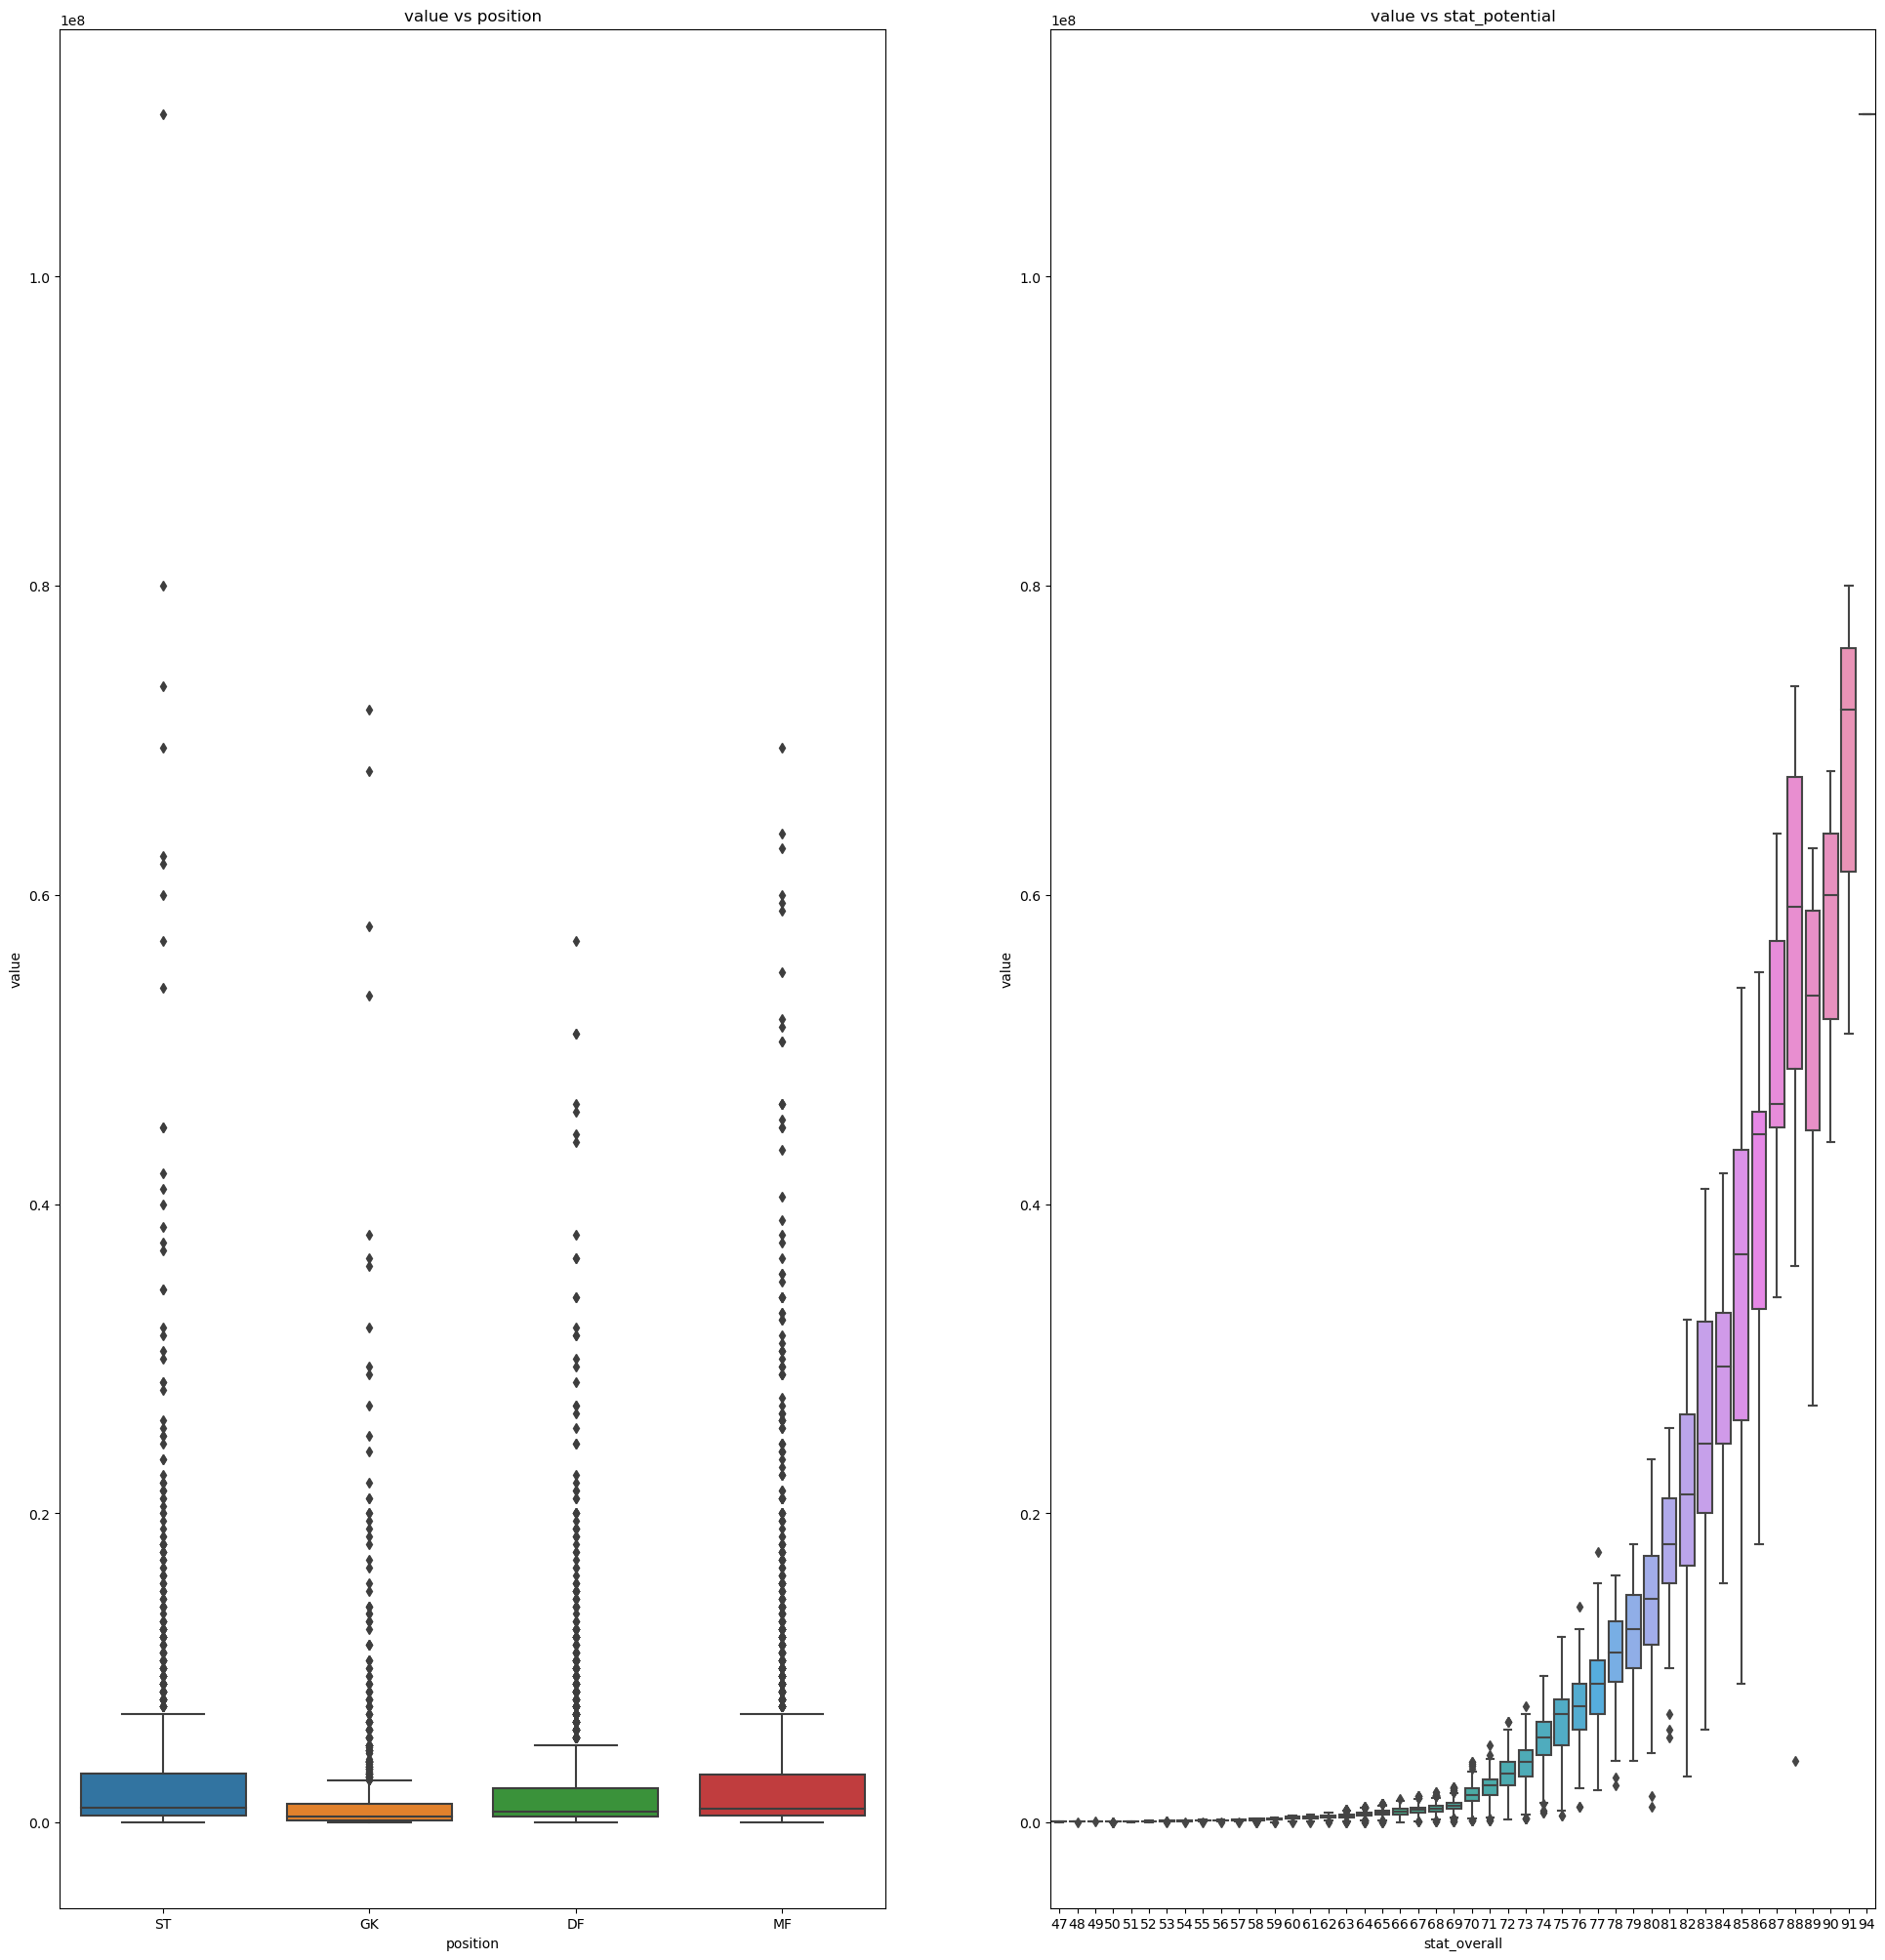

In [103]:
plt.figure(figsize = (24, 25))
plt.subplot(1, 2, 1)
sns.boxplot(x = "position", y = "value", data = data)
plt.title("value vs position")
plt.subplot(1, 2, 2)
sns.boxplot(x = "stat_overall", y = "value", data = data)
plt.title("value vs stat_potential")

(왼쪽 box plot) 포지션 별 평균 이적료 차이가 있음 -> 이를 높은 순서대로 label encoding 을 해도 좋을 것 같음  
(오른쪽 box plot) 능력치 별 평균 이적료를 나타낸 그림. 예상대로, 높은 능력치일수록 이적료가 지수적으로 증가

In [104]:
x_line = np.linspace(50, 95, 50)
a = 1.22
y_line = a**x_line - x_line*10000

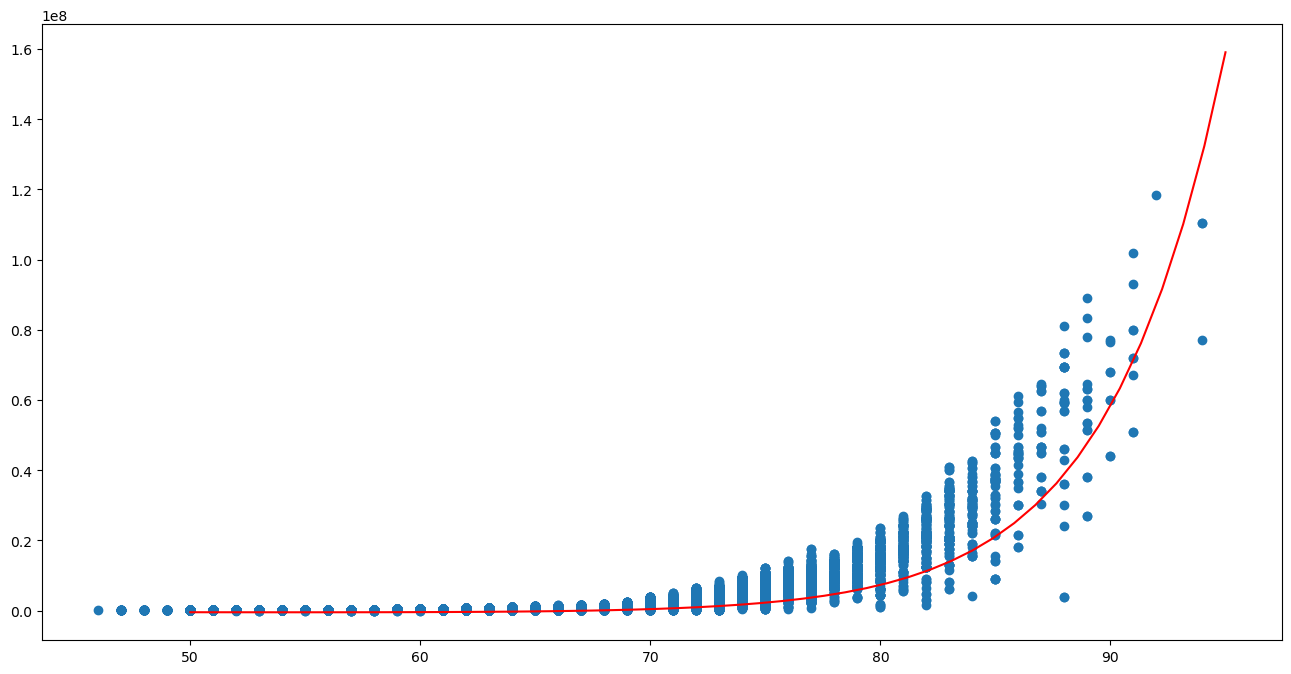

In [105]:
plt.figure(figsize = (16, 8))
plt.scatter(data = number_value, x = 'stat_overall', y ='value')
plt.plot(x_line, y_line, color='r', label=r"$(1/2)^x$")

파생변수 가설 1: 개인능력치와 이적료 사이는 지수관계이다.

In [106]:
number_value['relation_stat_value'] = 1.20**number_value['stat_overall'].values - number_value['stat_overall'].values*10000

C:\Users\User\AppData\Local\Temp\ipykernel_25172\5312207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number_value['relation_stat_value'] = 1.20**number_value['stat_overall'].values - number_value['stat_overall'].values*10000


In [107]:
number_value['relation_stat_value_po'] = 1.20**number_value['stat_potential'].values - number_value['stat_potential'].values*10000

C:\Users\User\AppData\Local\Temp\ipykernel_25172\373153453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number_value['relation_stat_value_po'] = 1.20**number_value['stat_potential'].values - number_value['stat_potential'].values*10000


In [108]:
number_value['value'] = number_value['value'].astype('float')

C:\Users\User\AppData\Local\Temp\ipykernel_25172\33748032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number_value['value'] = number_value['value'].astype('float')


In [109]:
number_value.corr()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po
age,1.000000,0.256816,0.459487,-0.244197,0.033201,0.081325,0.164093,-0.141613
reputation,0.256816,1.000000,0.507911,0.383270,0.204375,0.659745,0.706306,0.485223
stat_overall,0.459487,0.507911,1.000000,0.662748,0.411127,0.641038,0.573861,0.508598
stat_potential,-0.244197,0.383270,0.662748,1.000000,0.347680,0.590584,0.488916,0.708206
stat_skill_moves,0.033201,0.204375,0.411127,0.347680,1.000000,0.311187,0.210680,0.247701
value,0.081325,0.659745,0.641038,0.590584,0.311187,1.000000,0.923776,0.833178
relation_stat_value,0.164093,0.706306,0.573861,0.488916,0.210680,0.923776,1.000000,0.757311
relation_stat_value_po,-0.141613,0.485223,0.508598,0.708206,0.247701,0.833178,0.757311,1.000000


In [110]:
number_value.corr()['relation_stat_value_po']['value']

0.8331783802934183

[유망주 변수]  
파생변수 가설 2: 나이에 비해 명성이 높은 선수들은 이적료가 높을 것이다.  
단, 값 간의 차이를 주기 위해 가중치로 개인 능력치를 곱하여 출력 -> 개인 능력치를 고려한 나이 대비 명성을 의미  
명성이 축구를 잘해서 높은 사람과 다른 콘텐츠로(방송 등) 인해 높은 사람에게 차별성을 주기 위함

In [111]:
number_value['promising'] = number_value['stat_overall']*(number_value['reputation']/number_value['age'])

C:\Users\User\AppData\Local\Temp\ipykernel_25172\2031808802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number_value['promising'] = number_value['stat_overall']*(number_value['reputation']/number_value['age'])


<AxesSubplot:xlabel='promising', ylabel='value'>

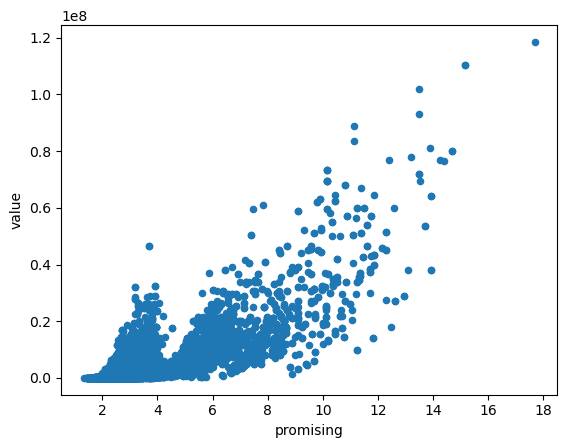

In [112]:
number_value.plot(kind='scatter', x = 'promising', y = 'value')

파생변수 3
-------
stat=(overall + 가중치 * potential)/ 1+가중치
---
가중치= potential / overall  - 발전가능한 크기
--
가중치>=1, 1이상이면 발전가능성이 있다
--
선수를 볼 때 현재의 능력치도 중요하지만, 미래의 능력치도 중요하다
--
여기서 말하는 stat은 발전 가능성이라는 가중치를 곱해줌에 따라 미래에 잘할 선수를 파악할 수 있는 파생변수

In [113]:
number_value['stat'] = ((number_value['stat_overall'].values * number_value['stat_overall'].values)+(number_value['stat_potential'].values * number_value['stat_potential'].values))/((number_value['stat_potential'].values + number_value['stat_overall'].values))

C:\Users\User\AppData\Local\Temp\ipykernel_25172\1883586285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number_value['stat'] = ((number_value['stat_overall'].values * number_value['stat_overall'].values)+(number_value['stat_potential'].values * number_value['stat_potential'].values))/((number_value['stat_potential'].values + number_value['stat_overall'].values))


In [114]:
number_value.corr()['stat']['value']

0.6744891745926334

In [115]:
number_value

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat
0,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000
1,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870
2,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000
3,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000
4,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590
...,...,...,...,...,...,...,...,...,...,...
26882,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429
26883,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636
26884,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386
26885,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345


<AxesSubplot:xlabel='reputation', ylabel='value'>

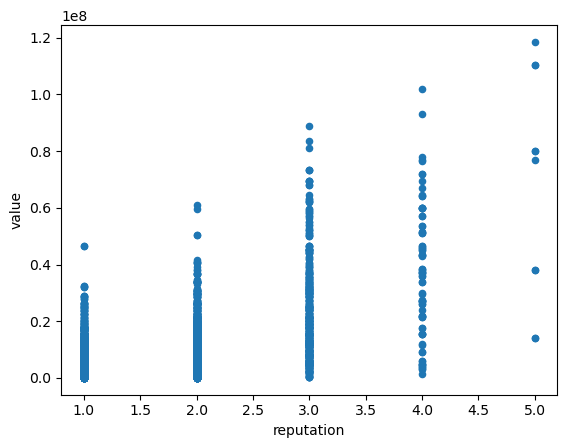

In [116]:
#유명한 정도와 이적료 사이에는 약한 상관관계
number_value.plot(kind='scatter', x = 'reputation', y = 'value')

In [117]:
number_value.corr()['reputation']['value']

0.659745224109799

In [118]:
number_value.corr()['value'].sort_values(ascending = False)

value                     1.000000
relation_stat_value       0.923776
relation_stat_value_po    0.833178
promising                 0.766781
stat                      0.674489
reputation                0.659745
stat_overall              0.641038
stat_potential            0.590584
stat_skill_moves          0.311187
age                       0.081325
Name: value, dtype: float64

In [119]:
final

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,31.0,south america,2021,ST,left,5.0,94.0,94,4.0,110500000.0
1,De Gea,27.0,europe,2020,GK,right,4.0,91.0,93,1.0,72000000.0
2,L. Suárez,31.0,south america,2021,ST,right,5.0,91.0,91,3.0,80000000.0
3,Sergio Ramos,32.0,europe,2020,DF,right,4.0,91.0,91,3.0,51000000.0
4,J. Oblak,25.0,europe,2021,GK,right,3.0,90.0,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...
26882,J. Lundstram,19.0,England,2019,CM,Right,1.0,47.0,65,2.0,60000.0
26883,N. Christoffersson,19.0,Sweden,2020,ST,Right,1.0,47.0,63,2.0,60000.0
26884,B. Worman,16.0,England,2021,ST,Right,1.0,47.0,67,2.0,60000.0
26885,D. Walker-Rice,17.0,England,2019,RW,Right,1.0,47.0,66,2.0,60000.0


Text(0.5, 1.0, 'value vs position')

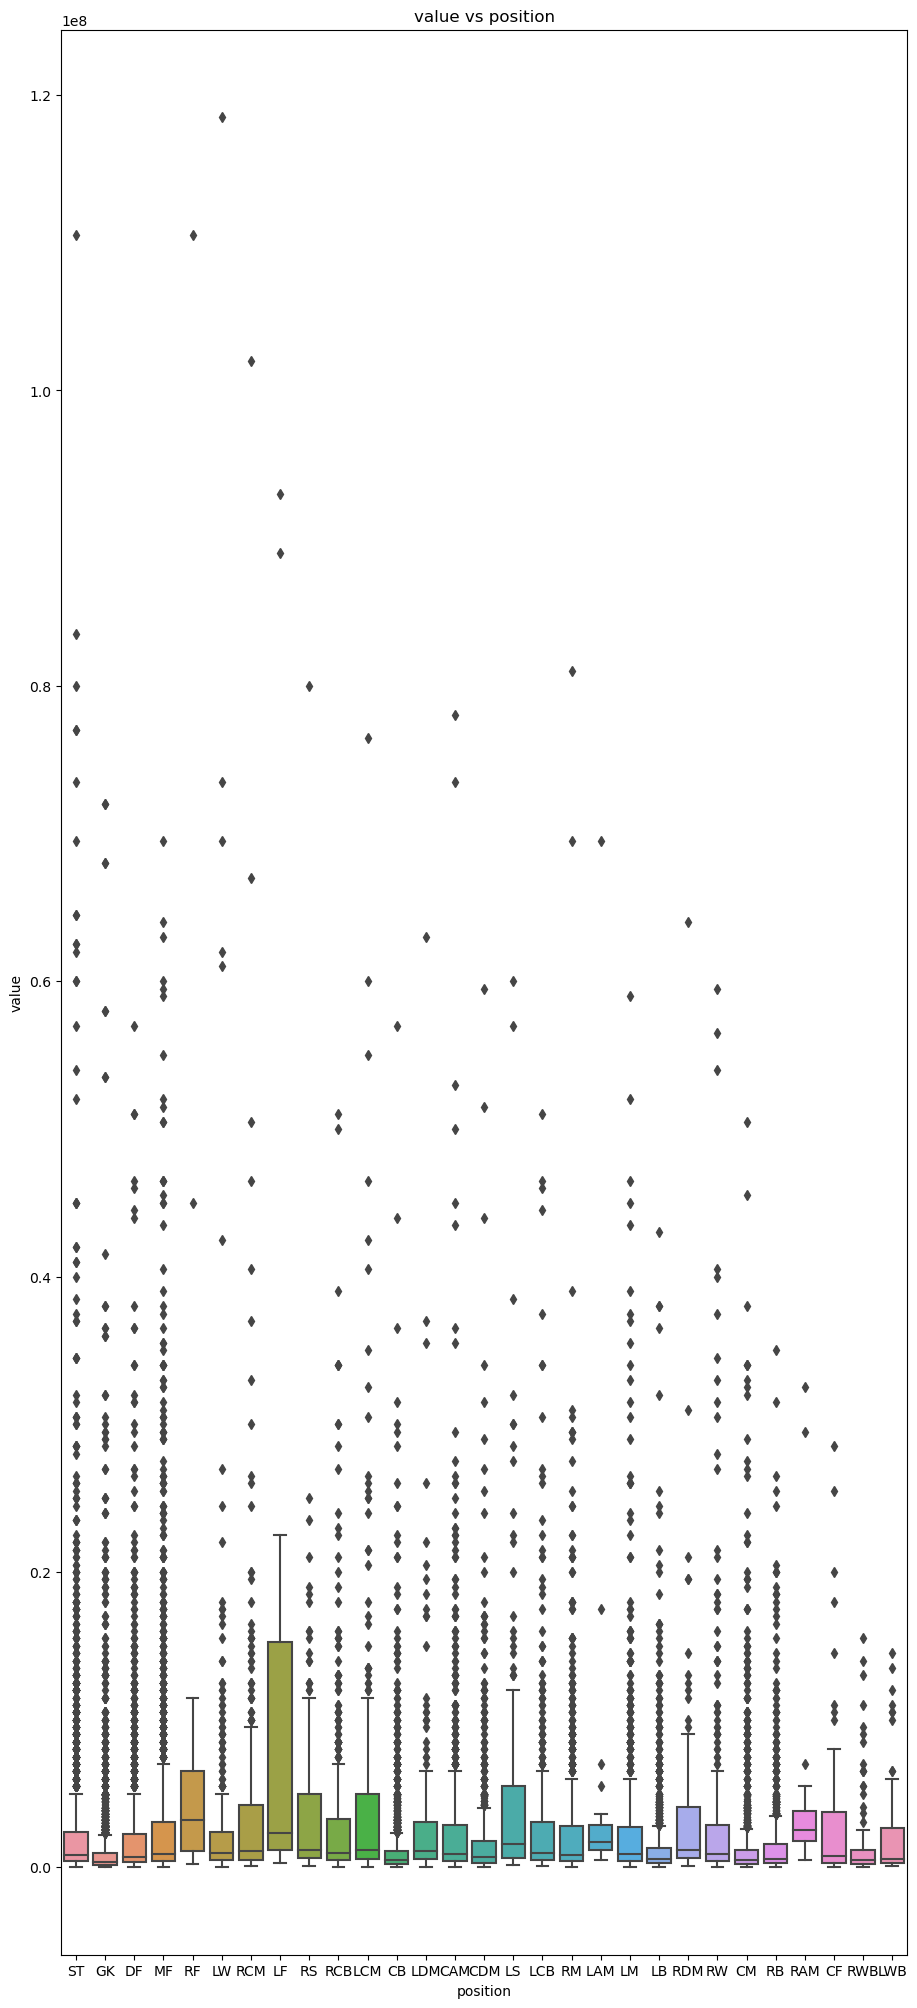

In [120]:
plt.figure(figsize = (24, 25))
plt.subplot(1, 2, 1)
sns.boxplot(x = "position", y = "value", data = final)
plt.title("value vs position")

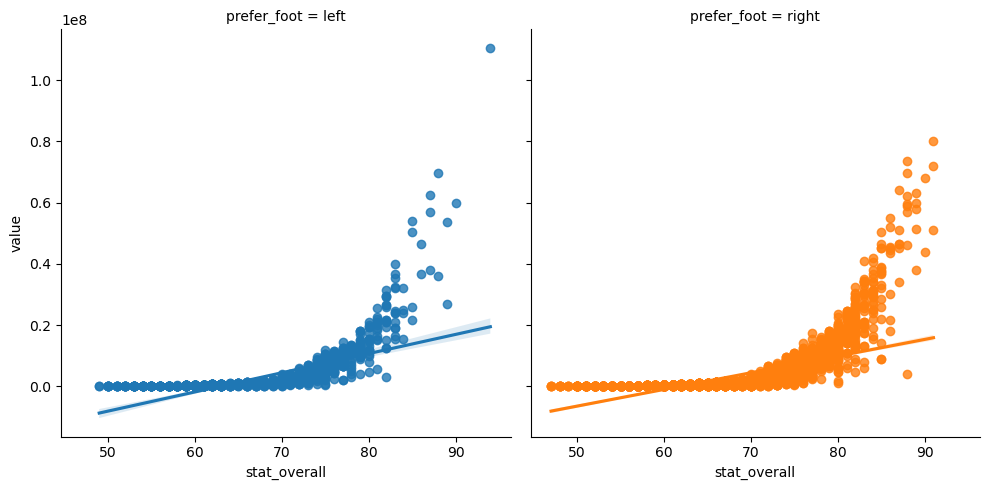

In [121]:
sns.lmplot(data = data, x='stat_overall', y='value', hue='prefer_foot', col='prefer_foot') 

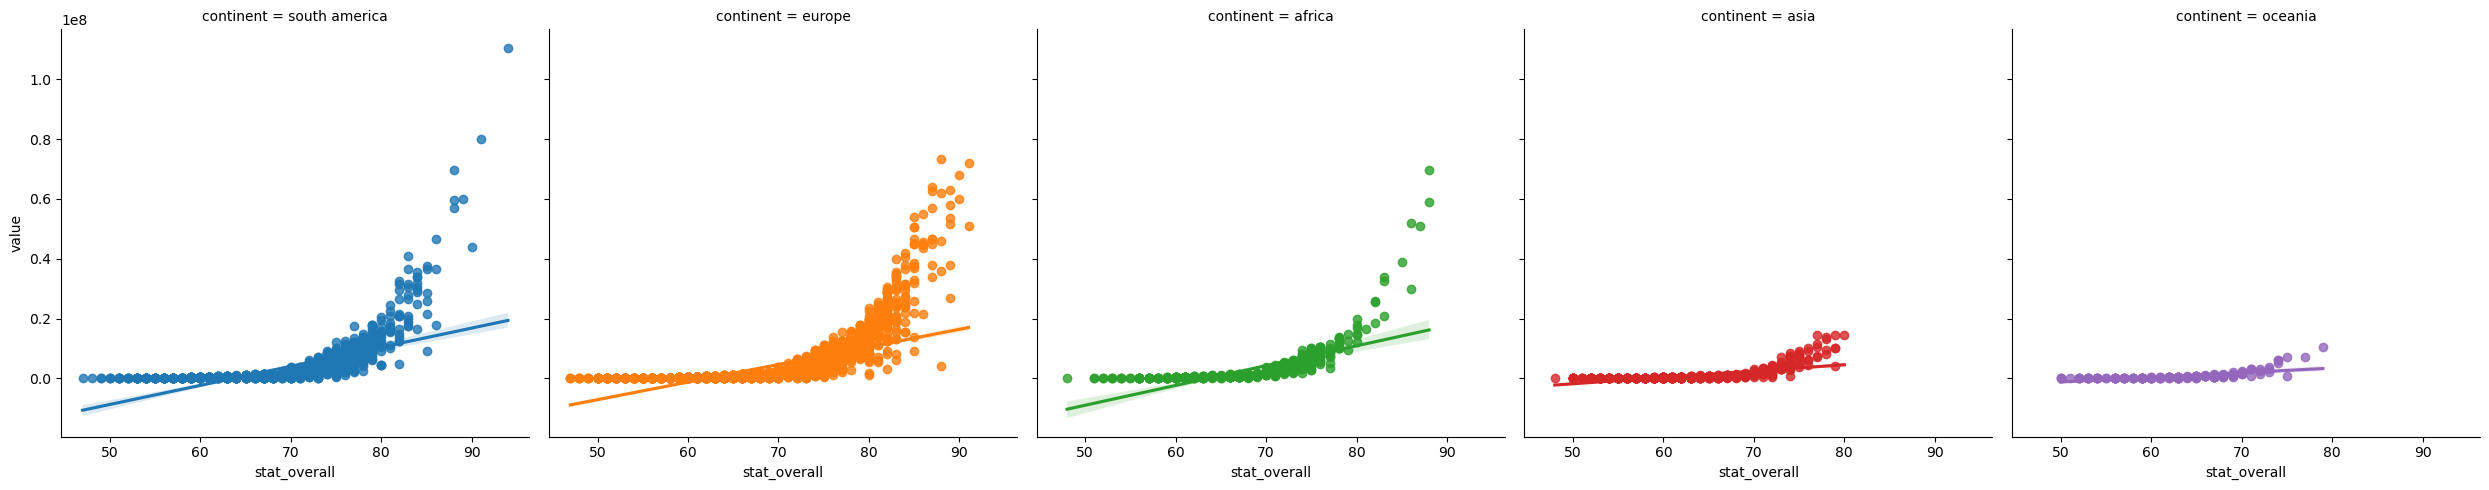

In [122]:
sns.lmplot(data = data, x='stat_overall', y='value', hue='continent', col='continent') 

In [123]:
#대륙별 가장 많이 차이가 나는 것은 이적료 평균
#제일 높은 순서대로 south america, africa, europe, asia, oceania -> label encoding 해도 좋을 듯
data.groupby(data['continent']).mean().sort_values('value', ascending = False)

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
continent,,,,,,
south america,26.349248,1.130773,68.643487,72.635184,2.481578,3.183204e+06
africa,25.185853,1.122053,68.041609,72.360610,2.606103,2.972247e+06
europe,24.808531,1.146937,67.083051,72.387636,2.371665,2.928125e+06
asia,25.311309,1.054638,63.381194,68.208386,2.259212,1.035146e+06
oceania,24.474286,1.022857,63.011429,68.640000,2.234286,8.225429e+05


In [124]:
#왼발러, 오른발러 큰 차이 없었음 -> 원핫인코딩
data.groupby(data['prefer_foot']).mean().sort_values('value', ascending = False)

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
prefer_foot,,,,,,
left,25.144153,1.127924,67.544153,72.311217,2.554654,2.865232e+06
right,25.229048,1.131783,66.952318,71.900980,2.354834,2.752150e+06


In [125]:
#위 박스플롯의 결과와 마찬가지로 ST -> MF -> DF -> GK 순으로 이적료가 높았음
#label encoding 필요
data.groupby(data['position']).mean().sort_values('value', ascending = False)

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
position,,,,,,
ST,24.740176,1.154252,67.300293,72.570088,2.781818,3.330361e+06
MF,24.938156,1.135648,67.373104,72.371937,2.759043,3.121762e+06
DF,25.618058,1.117879,67.304192,71.671444,2.236833,2.304348e+06
GK,25.791667,1.111111,65.188492,70.655754,1.000000,1.992073e+06


In [126]:
data.groupby(data['contract_until']).mean().sort_values('value', ascending = False)

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
contract_until,,,,,,
2026,23.000000,3.000000,85.000000,90.000000,3.000000,5.050000e+07
2024,22.250000,1.583333,80.333333,86.083333,2.916667,2.450833e+07
2025,19.666667,1.333333,71.000000,84.000000,3.666667,1.405333e+07
"May 31, 2020",31.000000,3.000000,77.000000,77.000000,4.000000,7.500000e+06
2022,24.254928,1.244415,70.818660,76.257556,2.604468,5.899074e+06
2023,24.934783,1.164032,69.847826,74.867589,2.559289,5.802115e+06
"Jun 30, 2020",23.000000,1.444444,69.444444,76.777778,2.777778,4.088889e+06
"Jun 30, 2019",23.065868,1.113772,68.269461,75.139721,2.626747,3.067136e+06
2021,24.443241,1.116984,66.300260,72.033362,2.370451,2.827543e+06


In [127]:
#계약년도 데이터는 전처리를 통해 숫자 4자리만 남기도록 함
for i in range(len(data)):
    if len(data['contract_until'].iloc[i]) > 2:
        data['contract_until'].iloc[i] = data['contract_until'].iloc[i][-2:]

C:\Users\User\AppData\Local\Temp\ipykernel_25172\2653487341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['contract_until'].iloc[i] = data['contract_until'].iloc[i][-2:]


In [128]:
#계약기간이 많이 남아있을 수록 value가 높음
data.groupby(data['contract_until']).mean().sort_values('value', ascending = False)

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
contract_until,,,,,,
26,23.000000,3.000000,85.000000,90.000000,3.000000,5.050000e+07
24,22.250000,1.583333,80.333333,86.083333,2.916667,2.450833e+07
25,19.666667,1.333333,71.000000,84.000000,3.666667,1.405333e+07
22,24.254928,1.244415,70.818660,76.257556,2.604468,5.899074e+06
23,24.934783,1.164032,69.847826,74.867589,2.559289,5.802115e+06
21,24.443241,1.116984,66.300260,72.033362,2.370451,2.827543e+06
20,25.295466,1.129205,67.112140,71.717699,2.392491,2.397036e+06
19,25.888237,1.116937,66.423939,70.882373,2.365643,1.746123e+06
18,26.593350,1.040921,65.291560,68.938619,2.276215,1.286407e+06


<Figure size 2400x1400 with 0 Axes>

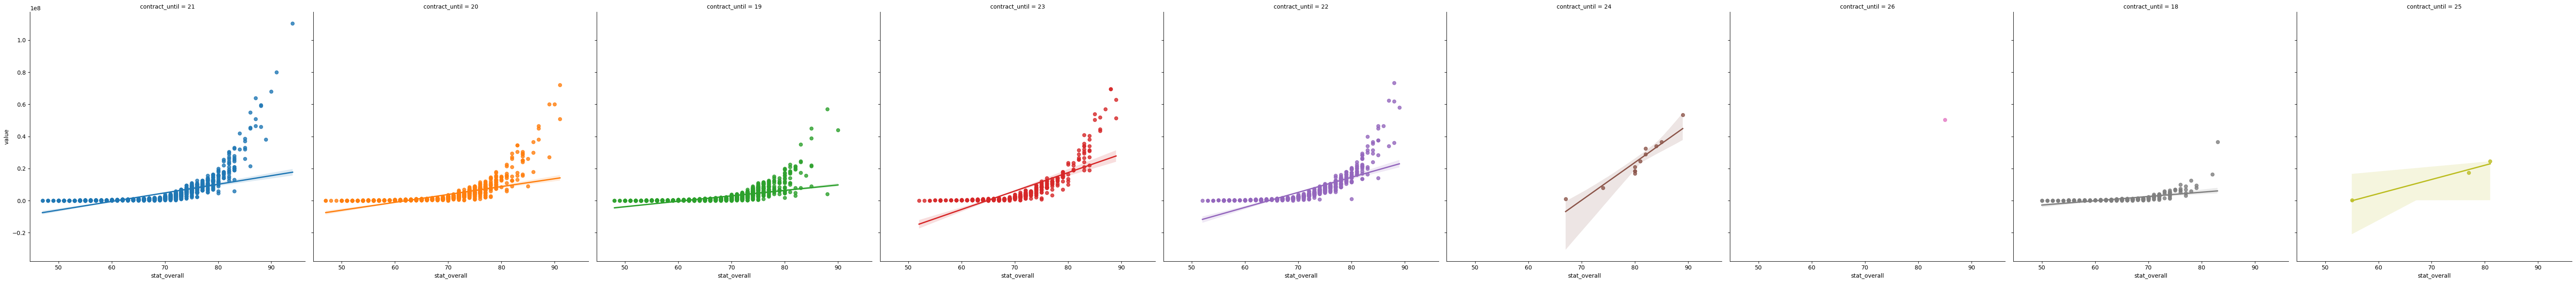

In [129]:
plt.figure(figsize=(24,14))
sns.lmplot(data = data, x='stat_overall', y='value', hue='contract_until', col='contract_until',height=7)
plt.show()

<AxesSubplot:xlabel='contract_until', ylabel='value'>

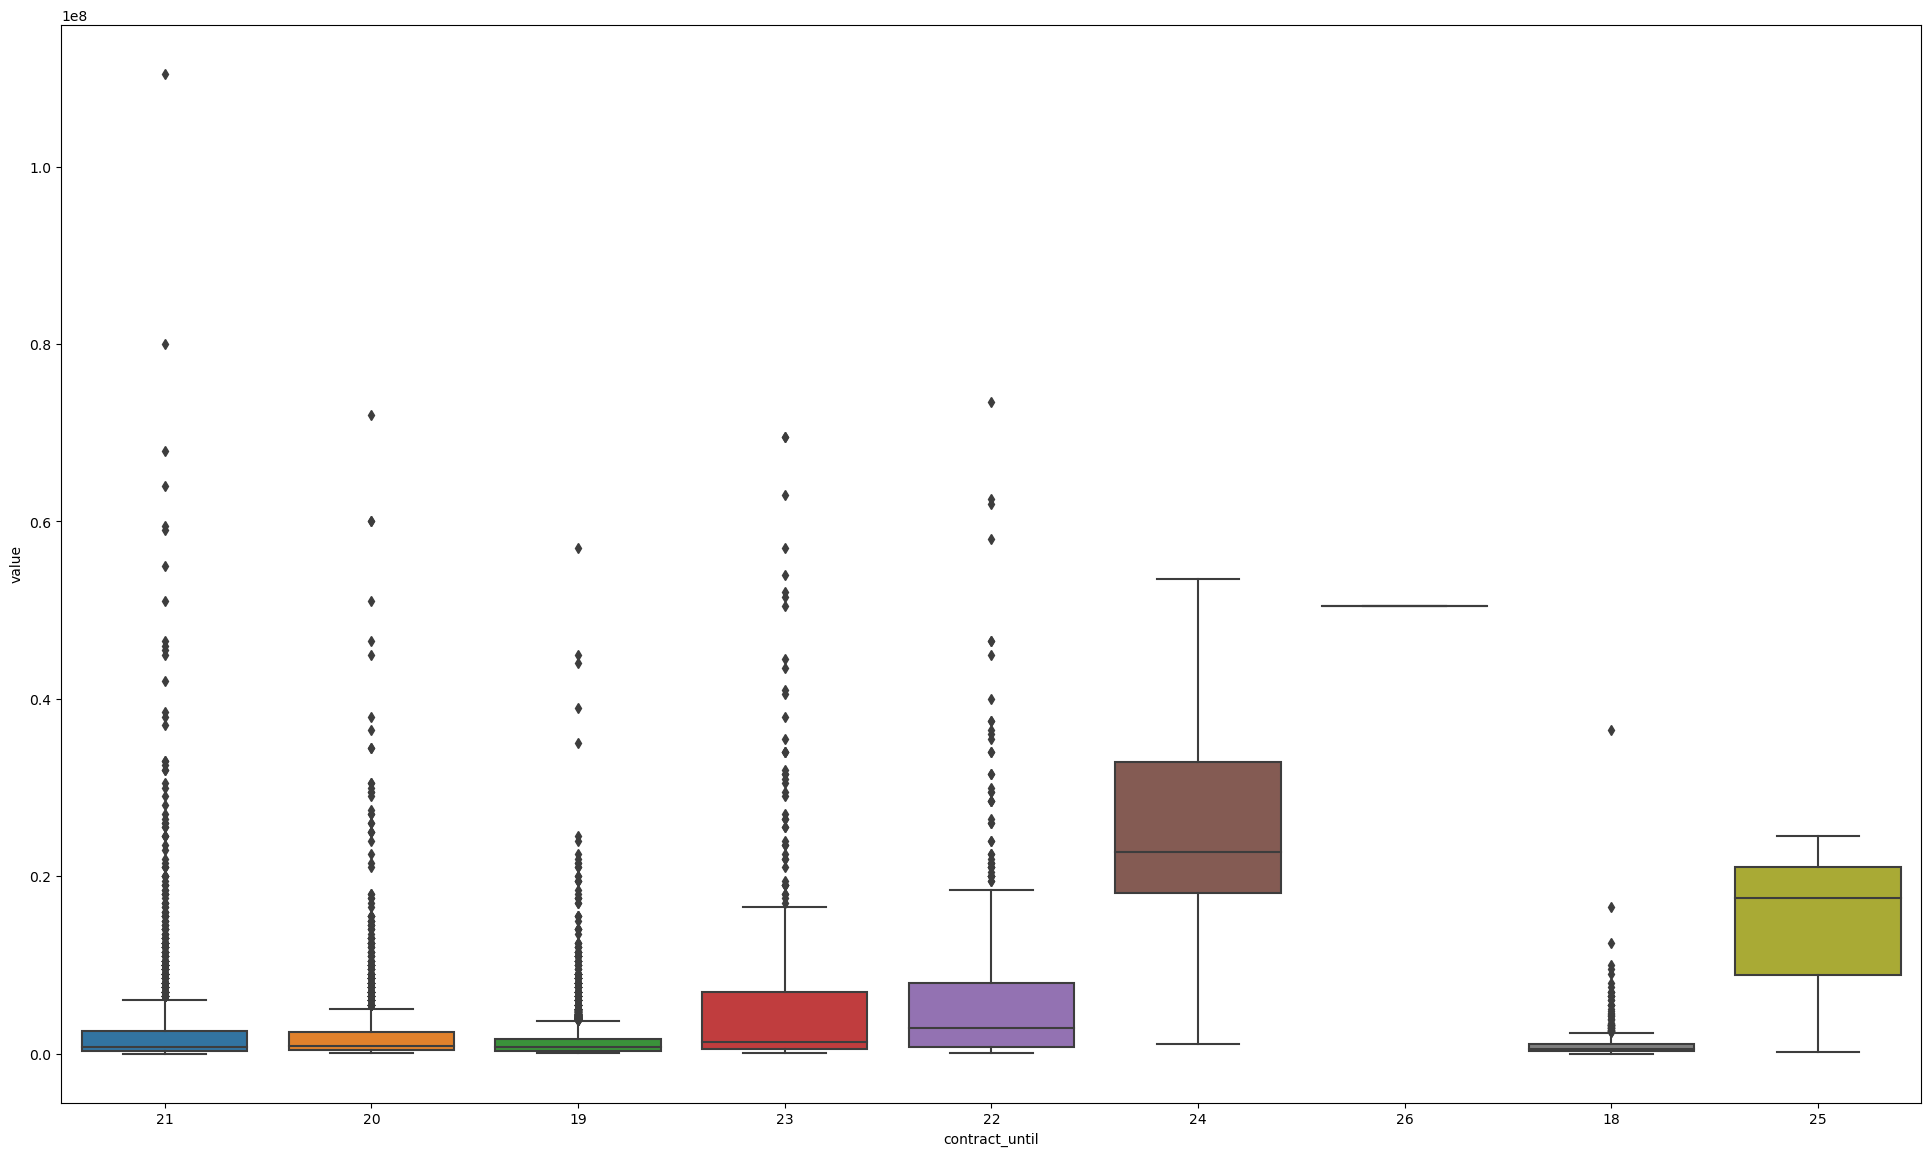

In [130]:
plt.figure(figsize=(24,14))
sns.boxplot(x = "contract_until", y = "value", data = data)

______

In [131]:
cat = final[['position','prefer_foot']]

In [132]:
number_value

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat
0,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000
1,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870
2,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000
3,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000
4,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590
...,...,...,...,...,...,...,...,...,...,...
26882,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429
26883,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636
26884,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386
26885,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345


In [133]:
eda_data = pd.concat([cat, number_value], axis = 1)

In [134]:
eda_data

,position,prefer_foot,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat
0,ST,left,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000
1,GK,right,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870
2,ST,right,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000
3,DF,right,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000
4,GK,right,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590
...,...,...,...,...,...,...,...,...,...,...,...,...
26882,CM,Right,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429
26883,ST,Right,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636
26884,ST,Right,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386
26885,RW,Right,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345


In [135]:
eda_data['position'].value_counts()

ST     3835
MF     3428
GK     2997
DF     2791
CB     1751
CM     1377
LB     1304
RB     1268
RM     1114
LM     1086
CAM     946
CDM     936
RCB     652
LCB     635
LCM     389
RCM     387
LW      374
RW      365
RDM     246
LDM     239
LS      206
RS      201
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: position, dtype: int64

In [138]:
#eda_data.drop(['contract_until','continent'],axis=1, inplace= True)

In [139]:
eda_data

,position,prefer_foot,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat
0,ST,left,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000
1,GK,right,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870
2,ST,right,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000
3,DF,right,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000
4,GK,right,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590
...,...,...,...,...,...,...,...,...,...,...,...,...
26882,CM,Right,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429
26883,ST,Right,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636
26884,ST,Right,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386
26885,RW,Right,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345


In [140]:
#label encoding
eda_data['position'] = eda_data['position'].replace(['ST','MF','DF','GK',
                                                    'CB', 'CM','LB','RB',
                                                    'RM','LM','CAM','CDM',
                                                    'RCB','LCB','LCM','RCM',
                                                    'LW','RW','RDM','LDM',
                                                    'LS','RS','RWB','LWB',
                                                    'CF','LAM','RAM','RF',
                                                    'LF'],[4,3,2,1,2,3,2,2,3,3,3,3,2,2,3,3,4,4,3,3,4,4,2,2,4,3,3,4,4]) 
eda_data['prefer_foot'] = eda_data['prefer_foot'].replace(['right','left','Right','Left'],[1,2,1,2]) 


In [141]:
eda_data['prefer_foot']

0        2.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
26882    1.0
26883    1.0
26884    1.0
26885    1.0
26886    1.0
Name: prefer_foot, Length: 26887, dtype: float64

In [142]:
drop_list = eda_data[eda_data['prefer_foot'].isnull()].index.tolist()

In [143]:
eda_data.drop(drop_list, axis = 0, inplace = True)

계약기간은 변수로 능력이 없다고 판단하여 삭제

In [144]:
eda_data

,position,prefer_foot,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat
0,4.0,2.0,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000
1,1.0,1.0,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870
2,4.0,1.0,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000
3,2.0,1.0,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000
4,1.0,1.0,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590
...,...,...,...,...,...,...,...,...,...,...,...,...
26882,3.0,1.0,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429
26883,4.0,1.0,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636
26884,4.0,1.0,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386
26885,4.0,1.0,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345


선호발은 OneHotencoding을 통해 encoding의 의미를 없앴다.

In [145]:
X_cat = eda_data[["prefer_foot"]] #꺽쇠를 1개를 하게 되면 데이터프레임 구조가 아닌 시리즈 구조로나타내게 됨
print(type(X_cat))
X_cat.head(10)

<class 'pandas.core.frame.DataFrame'>


,prefer_foot
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,2.0
7,1.0
8,1.0
9,2.0


In [146]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
X_cat_1hot = cat_encoder.fit_transform(X_cat)
X_cat_1hot

<26839x2 sparse matrix of type '<class 'numpy.float64'>'
	with 26839 stored elements in Compressed Sparse Row format>

In [147]:
X_cat_1hot.toarray()  #직접 보면 이렇게 

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [148]:
cat_encoder = OneHotEncoder(sparse=False)
eda_data_cat_1hot = cat_encoder.fit_transform(X_cat)
eda_data_cat_1hot

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [149]:
cat_encoder.categories_

[array([1., 2.])]

In [150]:
eda_data

,position,prefer_foot,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat
0,4.0,2.0,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000
1,1.0,1.0,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870
2,4.0,1.0,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000
3,2.0,1.0,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000
4,1.0,1.0,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590
...,...,...,...,...,...,...,...,...,...,...,...,...
26882,3.0,1.0,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429
26883,4.0,1.0,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636
26884,4.0,1.0,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386
26885,4.0,1.0,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345


In [151]:
len(eda_data)

26839

In [152]:
eda_data_cat_1hot.shape

(26839, 2)

In [155]:
eda_data

,position,prefer_foot,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat
0,4.0,2.0,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000
1,1.0,1.0,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870
2,4.0,1.0,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000
3,2.0,1.0,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000
4,1.0,1.0,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590
...,...,...,...,...,...,...,...,...,...,...,...,...
26882,3.0,1.0,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429
26883,4.0,1.0,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636
26884,4.0,1.0,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386
26885,4.0,1.0,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345


In [156]:
#1. 기존 변수를 제거
# eda_data.drop('prefer_foot', axis = 1, inplace = True)

#2. 인코딩한 변수를 추가
encoded = pd.DataFrame(eda_data_cat_1hot, columns=['Right','Left'])
encoded.reset_index(inplace = True)
eda_data.reset_index(inplace = True)
sex_jangchun = pd.concat([eda_data, encoded], axis = 1)

#3. 확인

sex_jangchun

,index,position,prefer_foot,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat,index,Right,Left
0,0,4.0,2.0,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000,0,0.0,1.0
1,1,1.0,1.0,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870,1,1.0,0.0
2,2,4.0,1.0,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000,2,1.0,0.0
3,3,2.0,1.0,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000,3,1.0,0.0
4,4,1.0,1.0,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590,4,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,26882,3.0,1.0,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429,26834,1.0,0.0
26835,26883,4.0,1.0,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636,26835,1.0,0.0
26836,26884,4.0,1.0,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386,26836,1.0,0.0
26837,26885,4.0,1.0,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345,26837,1.0,0.0


In [157]:
eda_data

,index,position,prefer_foot,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat
0,0,4.0,2.0,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000
1,1,1.0,1.0,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870
2,2,4.0,1.0,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000
3,3,2.0,1.0,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000
4,4,1.0,1.0,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,26882,3.0,1.0,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429
26835,26883,4.0,1.0,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636
26836,26884,4.0,1.0,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386
26837,26885,4.0,1.0,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345


In [158]:
eda_data= sex_jangchun

In [159]:
eda_data.drop('index', axis = 1, inplace =True)

Number of data: 26839


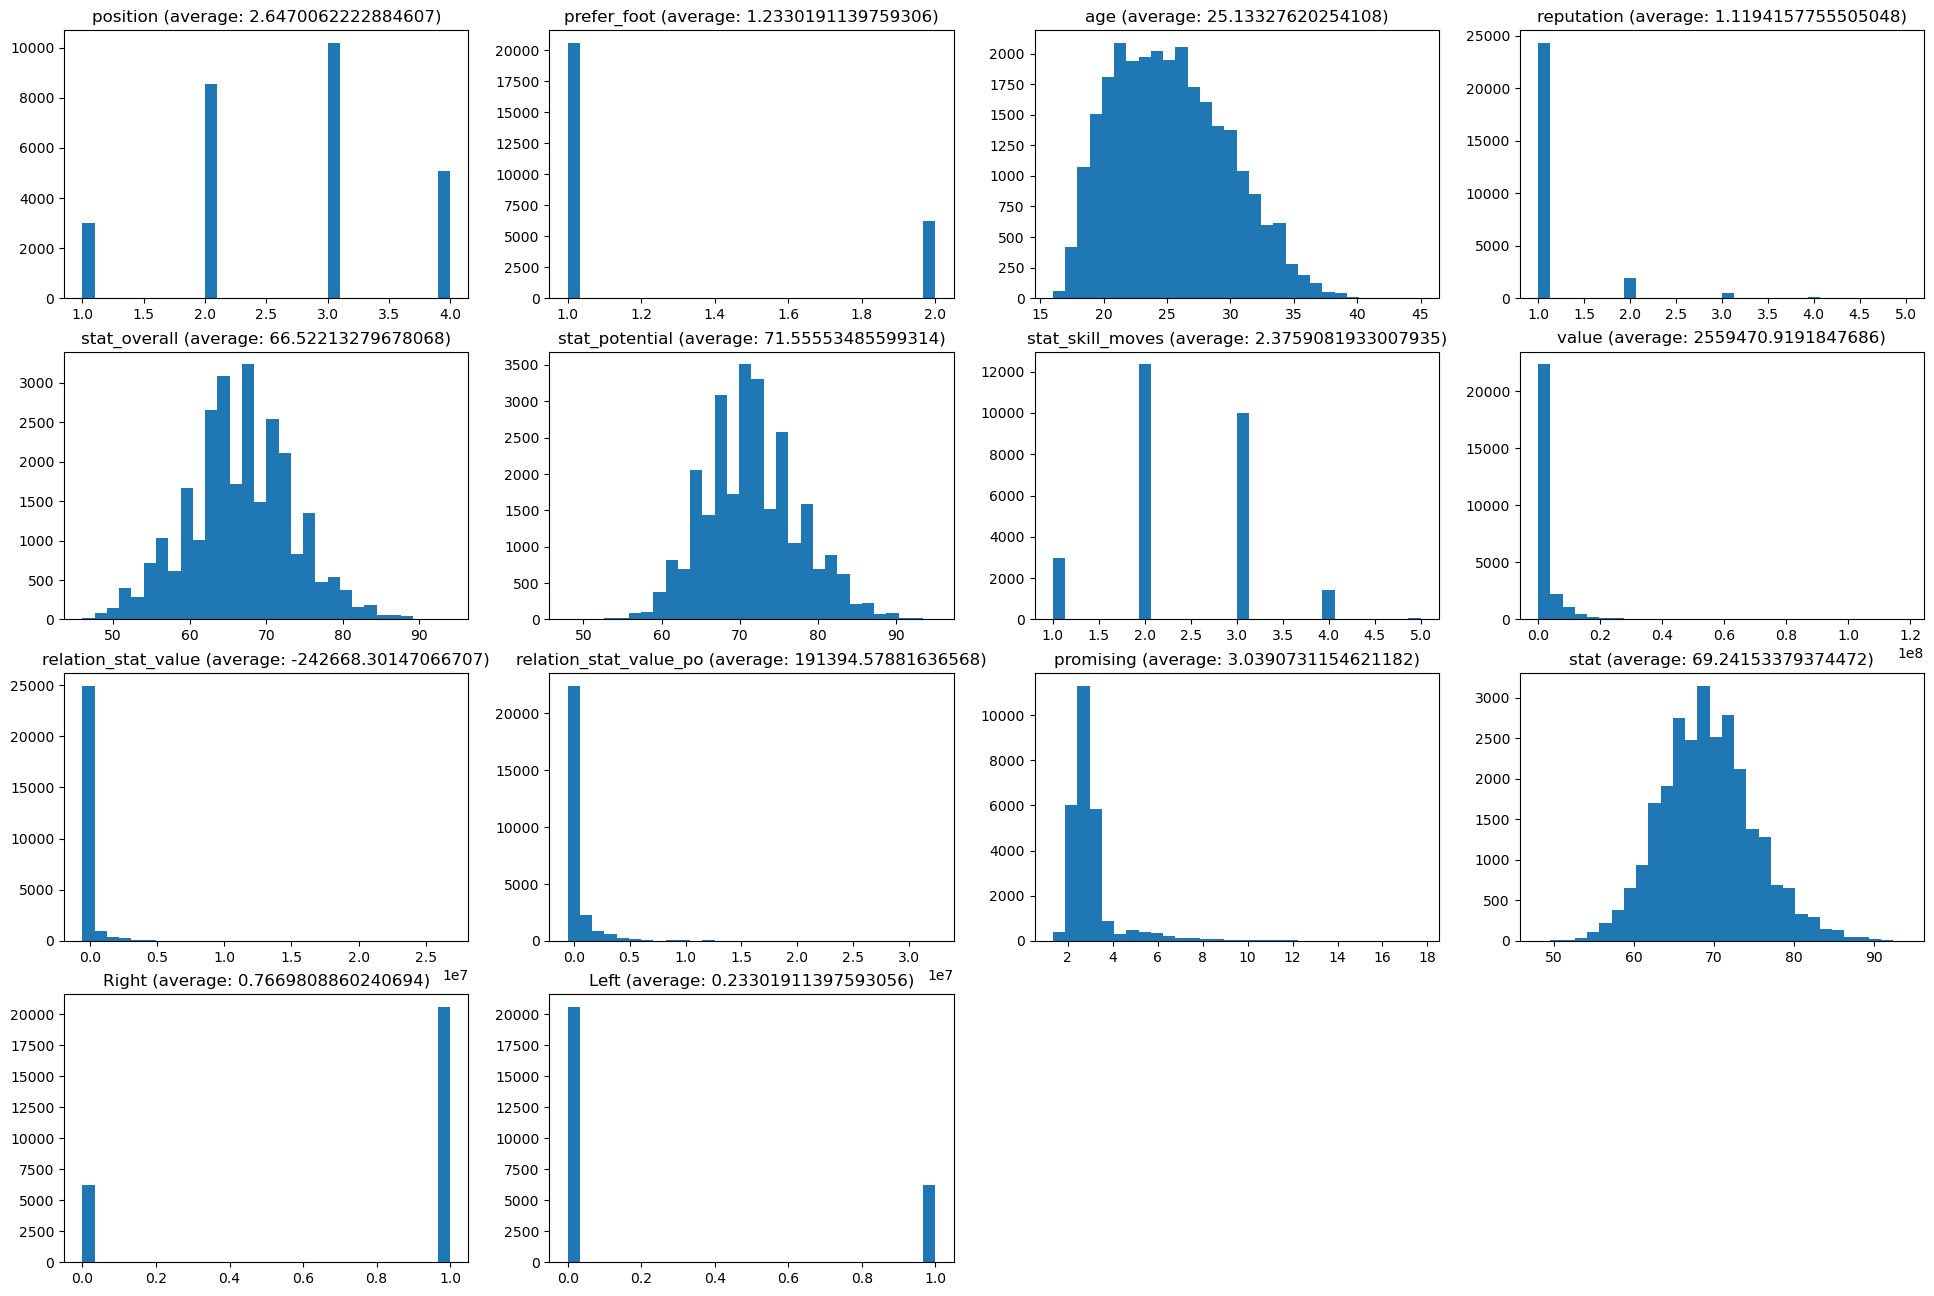

In [160]:
import math

def report(dataset, width = 4):
    print("Number of data:", dataset.shape[0])
    x = width
    y = math.ceil(dataset.shape[1] / x)
    column = dataset.columns.tolist()
    num_cols = set(dataset.select_dtypes(include=np.number).columns)
    plt.figure(figsize=(6 * x, 4 * y))
    for i in range(len(column)):
        plt.subplot(y, x, i + 1)
        if column[i] in num_cols:
          plt.hist(dataset[column[i]], bins = 30)
          plt.title(column[i] + " (average: "+str(dataset[column[i]].mean()) + ")")
        else:
          temp = dataset[column[i]].value_counts()
          plt.barh(temp.index, temp.values)
          plt.title(column[i])

report(eda_data)

 - 종속 변수의 왜도를 고려할 것인지 결정
 - 독립 변수의 왜도를 고려할 것인지 결정

 - reputation은 log를 씌워 정규화를 하고, 다른 왜도가 큰 변수들은 음수 값이 있고, 지수 관계를 포함하고 있으므로 그냥 놔둔다

In [161]:
eda_data['log_reputation']=np.log1p(eda_data['reputation'])
#eda_data.drop('reputation', axis = 1, inplace = True)

In [162]:
print('{:15}'.format('log_reputation'), 
      'Skewness: {:05.2f}'.format(eda_data['log_reputation'].skew()) , 
      '   ' ,
      'Kurtosis: {:06.2f}'.format(eda_data['log_reputation'].kurt())  
     )

log_reputation  Skewness: 03.37     Kurtosis: 011.22


(array([2.4312e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.9510e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.8400e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        8.2000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+01]),
 array([0.69314718, 0.72976759, 0.766388  , 0.80300841, 0.83962882,
        0.87624923, 0.91286964, 0.94949005, 0.98611046, 1.02273087,
        1.05935128, 1.09597169, 1.1325921 , 1.16921251, 1.20583292,
        1.24245332, 1.27907373, 1.31569414, 1.35231455, 1.38893496,
        1.42555537, 1.46217578, 1.49879619, 1.5354166 , 1.57203701,
        1.60865742, 1.64527783, 1.68189824, 1.71851865, 1.75513906,
        1.79175947]),
 <BarContainer object of 30 artists>)

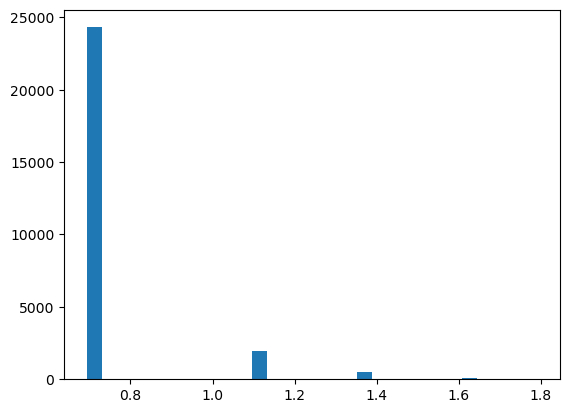

In [163]:
plt.hist(eda_data['log_reputation'], bins = 30)

Number of data: 26839


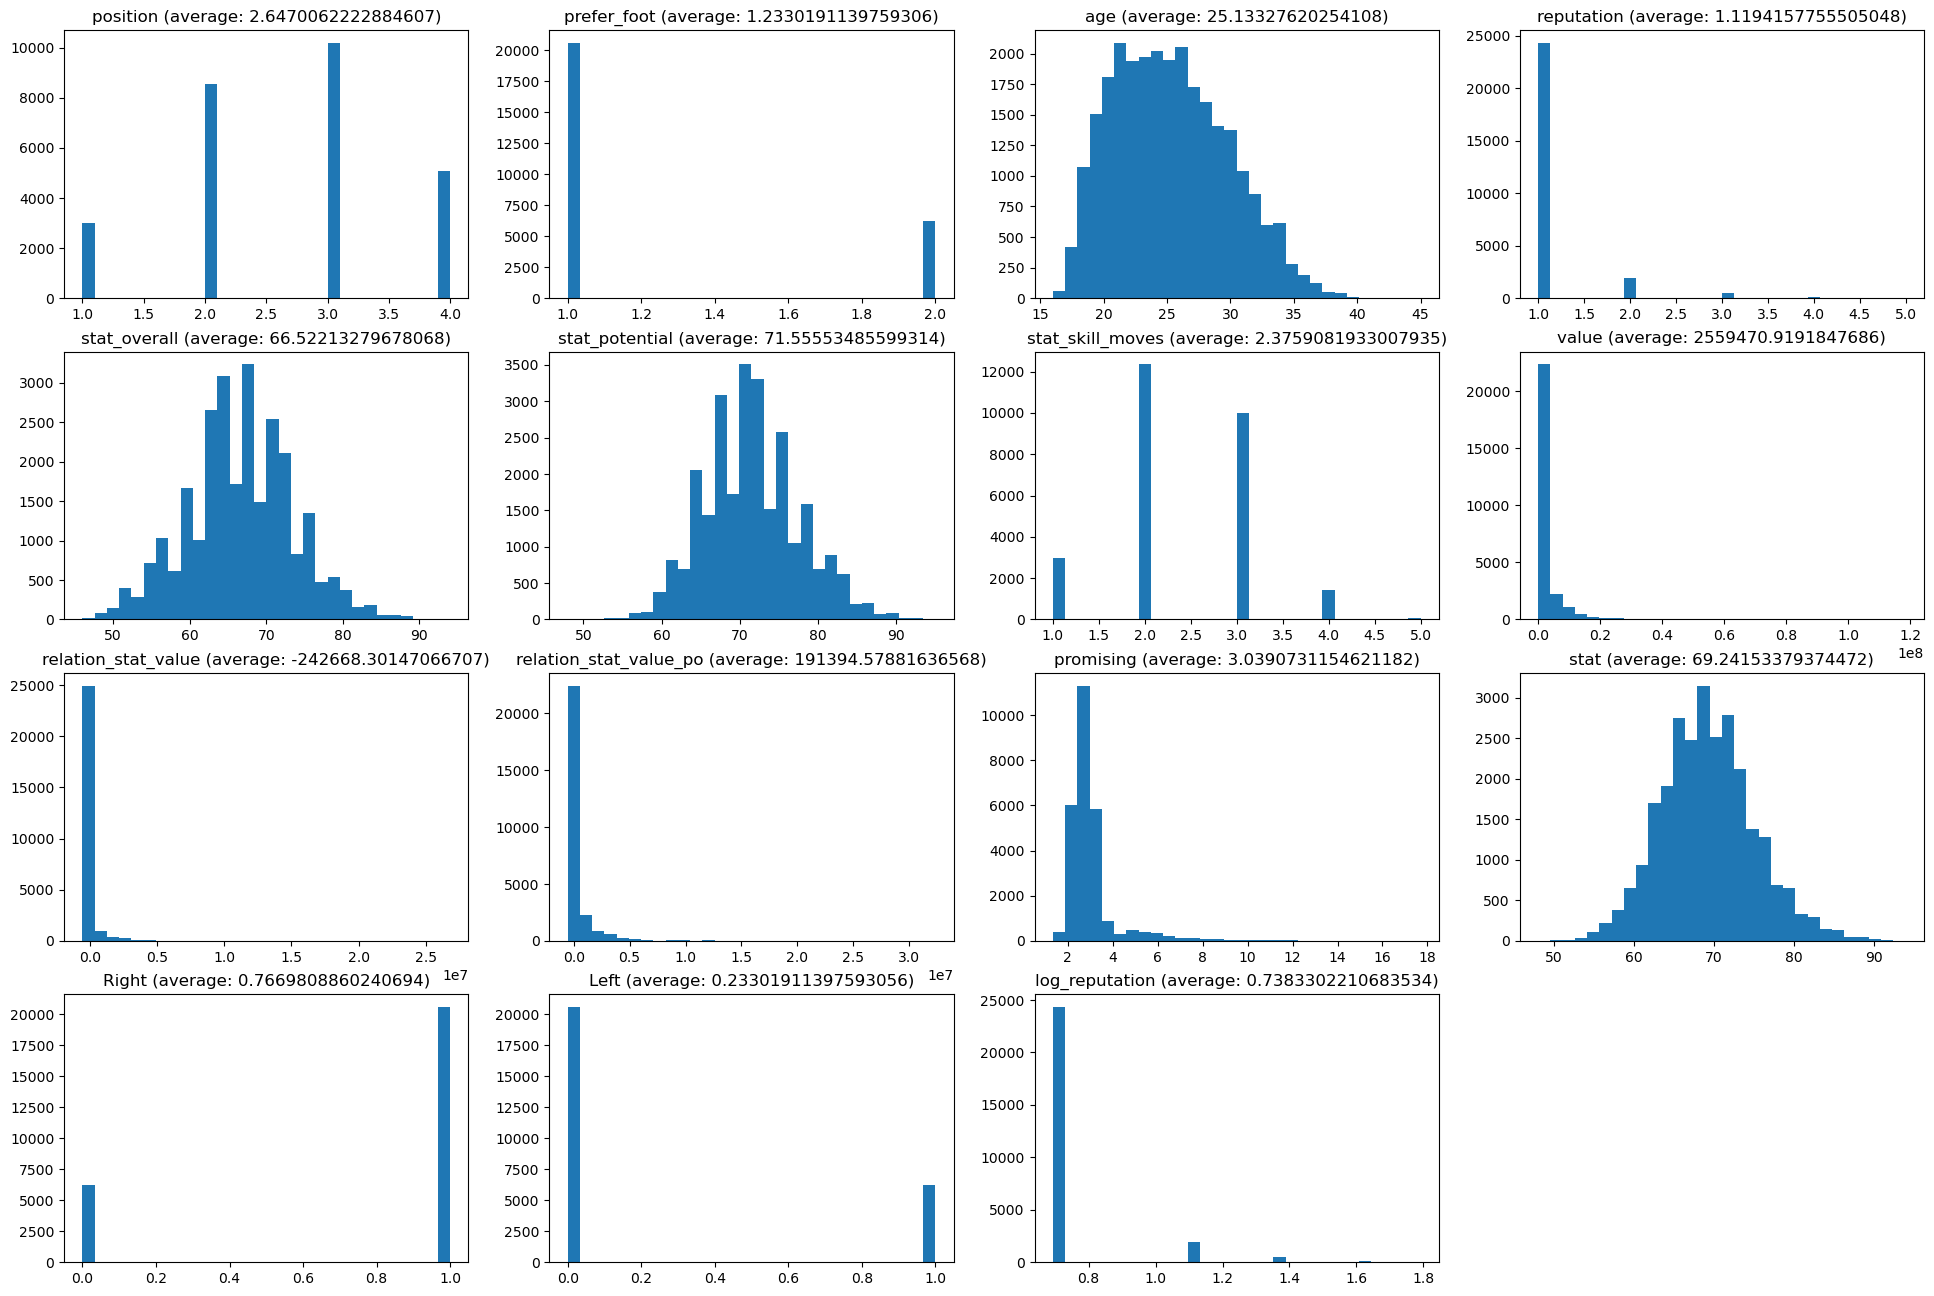

In [164]:
import math
def report(dataset, width = 4):
    print("Number of data:", dataset.shape[0])
    x = width
    y = math.ceil(dataset.shape[1] / x)
    column = dataset.columns.tolist()
    num_cols = set(dataset.select_dtypes(include=np.number).columns)
    plt.figure(figsize=(6 * x, 4 * y))
    for i in range(len(column)):
        plt.subplot(y, x, i + 1)
        if column[i] in num_cols:
          plt.hist(dataset[column[i]], bins = 30)
          plt.title(column[i] + " (average: "+str(dataset[column[i]].mean()) + ")")
        else:
          temp = dataset[column[i]].value_counts()
          plt.barh(temp.index, temp.values)
          plt.title(column[i])
report(eda_data)

 - 다수의 수치형 변수가 정규분포를 따르지 않음 -> 나중에 min max scaling 을 해야할 듯

In [165]:
eda_data

,position,prefer_foot,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat,Right,Left,log_reputation
0,4.0,2.0,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000,0.0,1.0,1.791759
1,1.0,1.0,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870,1.0,0.0,1.609438
2,4.0,1.0,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000,1.0,0.0,1.791759
3,2.0,1.0,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000,1.0,0.0,1.609438
4,1.0,1.0,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590,1.0,0.0,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,3.0,1.0,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429,1.0,0.0,0.693147
26835,4.0,1.0,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636,1.0,0.0,0.693147
26836,4.0,1.0,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386,1.0,0.0,0.693147
26837,4.0,1.0,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345,1.0,0.0,0.693147


<AxesSubplot:>

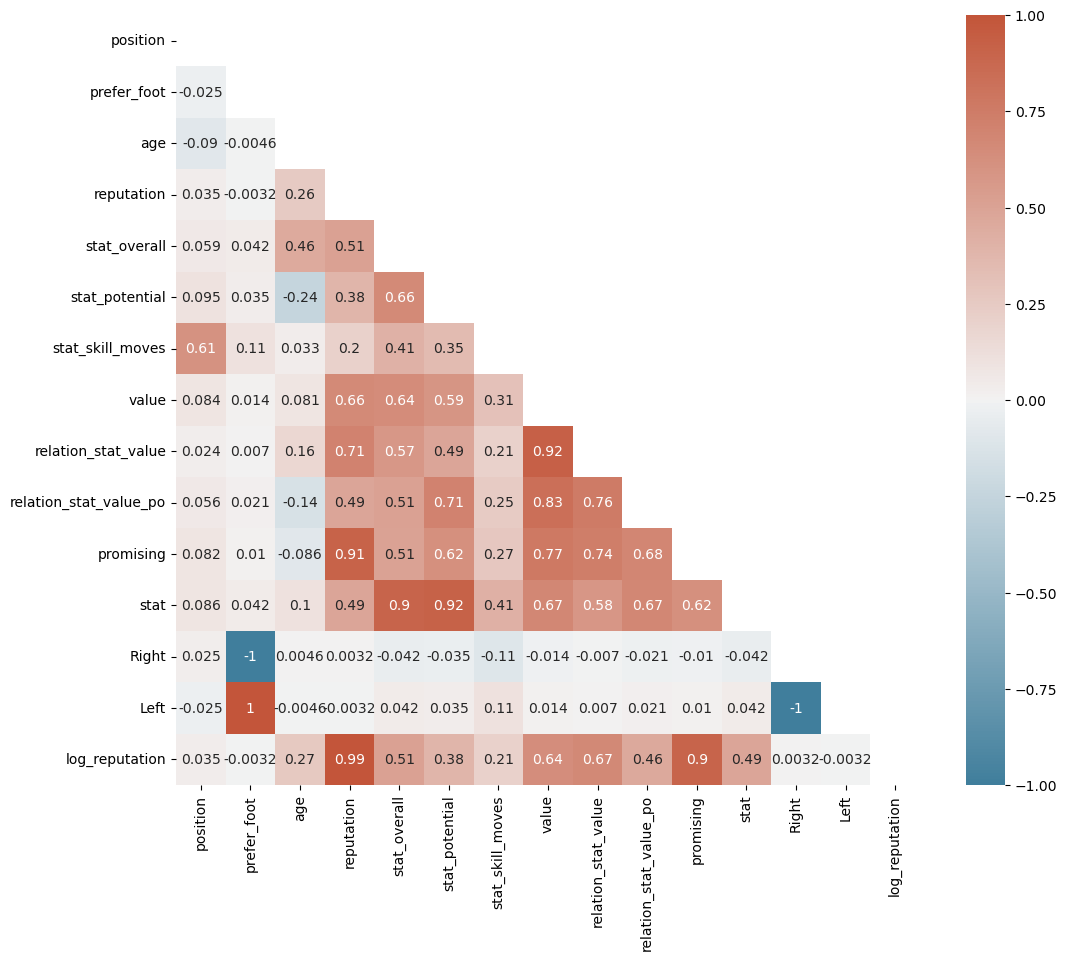

In [166]:
# Correlation between different variables
#
corr = eda_data.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [167]:
eda_data

,position,prefer_foot,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat,Right,Left,log_reputation
0,4.0,2.0,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000,0.0,1.0,1.791759
1,1.0,1.0,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870,1.0,0.0,1.609438
2,4.0,1.0,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000,1.0,0.0,1.791759
3,2.0,1.0,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000,1.0,0.0,1.609438
4,1.0,1.0,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590,1.0,0.0,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,3.0,1.0,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429,1.0,0.0,0.693147
26835,4.0,1.0,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636,1.0,0.0,0.693147
26836,4.0,1.0,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386,1.0,0.0,0.693147
26837,4.0,1.0,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345,1.0,0.0,0.693147


test 데이터 또한 train 과 마찬가지로 전처리 진행

In [168]:
data_test = pd.read_csv('FIFA_test.csv')

In [169]:
data_test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0
3824,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0
3825,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0
3826,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0


In [170]:
data_test['position'] = data_test['position'].replace(['ST','MF','DF','GK'],[4,3,2,1]) 
data_test['prefer_foot'] = data_test['prefer_foot'].replace(['right','left'],[1,2]) 
data_test['continent'] =data_test['continent'].replace(['south america','europe','africa','asia','oceania'],[1,2,3,4,5])

In [171]:
data_test.drop(['id','name','contract_until'],axis=1 , inplace=True)
data_test

,age,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,2,4,1,5.0,94,94,5.0
1,26,1,4,1,5.0,92,93,5.0
2,27,2,3,1,4.0,91,92,4.0
3,27,2,4,1,4.0,91,91,4.0
4,32,2,3,1,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...
3823,20,4,3,1,1.0,48,63,2.0
3824,18,2,1,1,1.0,48,65,1.0
3825,18,1,3,1,1.0,48,65,2.0
3826,18,2,4,1,1.0,47,61,2.0


In [172]:
data_test

,age,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,2,4,1,5.0,94,94,5.0
1,26,1,4,1,5.0,92,93,5.0
2,27,2,3,1,4.0,91,92,4.0
3,27,2,4,1,4.0,91,91,4.0
4,32,2,3,1,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...
3823,20,4,3,1,1.0,48,63,2.0
3824,18,2,1,1,1.0,48,65,1.0
3825,18,1,3,1,1.0,48,65,2.0
3826,18,2,4,1,1.0,47,61,2.0


In [173]:
data_test.describe()

,age,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000
mean,25.297806,2.101097,2.641327,1.238506,1.143939,67.336991,72.107628,2.414838
std,4.628236,0.912400,0.905019,0.426226,0.448465,6.908814,6.133428,0.781153
min,16.000000,1.000000,1.000000,1.000000,1.000000,47.000000,52.000000,1.000000
25%,22.000000,2.000000,2.000000,1.000000,1.000000,63.000000,68.000000,2.000000
50%,25.000000,2.000000,3.000000,1.000000,1.000000,67.000000,72.000000,2.000000
75%,29.000000,2.000000,3.000000,1.000000,1.000000,72.000000,76.000000,3.000000
max,42.000000,5.000000,4.000000,2.000000,5.000000,94.000000,95.000000,5.000000


In [174]:
number_value_test = data_test[['age', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves']]
cat_value_test = data_test[['continent', 'position', 'prefer_foot']]

In [175]:
number_value_test['relation_stat_value'] = 1.20**number_value_test['stat_overall'].values - number_value_test['stat_overall'].values*10000

C:\Users\User\AppData\Local\Temp\ipykernel_25172\4220168881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number_value_test['relation_stat_value'] = 1.20**number_value_test['stat_overall'].values - number_value_test['stat_overall'].values*10000


In [176]:
number_value_test['relation_stat_value_po'] = 1.20**number_value_test['stat_potential'].values - number_value_test['stat_potential'].values*10000

C:\Users\User\AppData\Local\Temp\ipykernel_25172\3613306419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number_value_test['relation_stat_value_po'] = 1.20**number_value_test['stat_potential'].values - number_value_test['stat_potential'].values*10000


In [177]:
number_value_test['promising'] = number_value_test['stat_overall']*(number_value_test['reputation']/number_value_test['age'])

In [178]:
number_value_test['stat'] = ((number_value_test['stat_overall'].values * number_value_test['stat_overall'].values)+(number_value_test['stat_potential'].values * number_value_test['stat_potential'].values))/((number_value_test['stat_potential'].values + number_value_test['stat_overall'].values))

In [179]:
cat_test = data_test[['continent','position','prefer_foot']]

In [180]:
eda_data_test = pd.concat([cat_test, number_value_test], axis = 1)

In [181]:
eda_data_test['position'] = eda_data_test['position'].replace(['ST','MF','DF','GK'],[4,3,2,1])

eda_data_test['prefer_foot'] = eda_data_test['prefer_foot'].replace(['left','right'],[1,2]) 

eda_data_test['continent'] = eda_data_test['continent'].replace(['south america','europe','africa','asia','oceania'],[1,2,3,4,5])

In [182]:
X_cat2 = eda_data_test[["prefer_foot"]] #꺽쇠를 1개를 하게 되면 데이터프레임 구조가 아닌 시리즈 구조로나타내게 됨
print(type(X_cat))
X_cat.head(10)

<class 'pandas.core.frame.DataFrame'>


,prefer_foot
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,2.0
7,1.0
8,1.0
9,2.0


In [183]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder2 = OneHotEncoder()
X_cat_1hot2 = cat_encoder2.fit_transform(X_cat2)
X_cat_1hot2

<3828x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3828 stored elements in Compressed Sparse Row format>

In [184]:
X_cat_1hot2.toarray()  #직접 보면 이렇게 

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [185]:
cat_encoder2 = OneHotEncoder(sparse=False)
eda_data_cat_1hot2 = cat_encoder2.fit_transform(X_cat2)
eda_data_cat_1hot2

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [186]:
cat_encoder2.categories_

[array([1, 2], dtype=int64)]

In [187]:
eda_data_test

,continent,position,prefer_foot,age,reputation,stat_overall,stat_potential,stat_skill_moves,relation_stat_value,relation_stat_value_po,promising,stat
0,2,4,1,33,5.0,94,94,5.0,2.679557e+07,2.679557e+07,14.242424,94.000000
1,1,4,1,26,5.0,92,93,5.0,1.834081e+07,2.218298e+07,17.692308,92.502703
2,2,3,1,27,4.0,91,92,4.0,1.514068e+07,1.834081e+07,13.481481,91.502732
3,2,4,1,27,4.0,91,91,4.0,1.514068e+07,1.514068e+07,13.481481,91.000000
4,2,3,1,32,4.0,91,91,4.0,1.514068e+07,1.514068e+07,11.375000,91.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3823,4,3,1,20,1.0,48,63,2.0,-4.736803e+05,-5.326315e+05,2.400000,56.513514
3824,2,1,1,18,1.0,48,65,1.0,-4.736803e+05,-5.097894e+05,2.666667,57.778761
3825,1,3,1,18,1.0,48,65,2.0,-4.736803e+05,-5.097894e+05,2.666667,57.778761
3826,2,4,1,18,1.0,47,61,2.0,-4.647335e+05,-5.423830e+05,2.611111,54.907407


In [188]:
#1. 기존 변수를 제거
eda_data_test.drop('prefer_foot', axis = 1, inplace = True)

#2. 인코딩한 변수를 추가
encoded2 = pd.DataFrame(eda_data_cat_1hot2, columns=['right', 'left'])
sexy_jangchun2 = pd.concat([eda_data_test, encoded2], 1)

#3. 확인

sexy_jangchun2.head()

C:\Users\User\AppData\Local\Temp\ipykernel_25172\1175005128.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  sexy_jangchun2 = pd.concat([eda_data_test, encoded2], 1)


,continent,position,age,reputation,stat_overall,stat_potential,stat_skill_moves,relation_stat_value,relation_stat_value_po,promising,stat,right,left
0,2,4,33,5.0,94,94,5.0,2.679557e+07,2.679557e+07,14.242424,94.000000,1.0,0.0
1,1,4,26,5.0,92,93,5.0,1.834081e+07,2.218298e+07,17.692308,92.502703,1.0,0.0
2,2,3,27,4.0,91,92,4.0,1.514068e+07,1.834081e+07,13.481481,91.502732,1.0,0.0
3,2,4,27,4.0,91,91,4.0,1.514068e+07,1.514068e+07,13.481481,91.000000,1.0,0.0
4,2,3,32,4.0,91,91,4.0,1.514068e+07,1.514068e+07,11.375000,91.000000,1.0,0.0


In [189]:
eda_data_test = sexy_jangchun2

In [190]:
eda_data_test

,continent,position,age,reputation,stat_overall,stat_potential,stat_skill_moves,relation_stat_value,relation_stat_value_po,promising,stat,right,left
0,2,4,33,5.0,94,94,5.0,2.679557e+07,2.679557e+07,14.242424,94.000000,1.0,0.0
1,1,4,26,5.0,92,93,5.0,1.834081e+07,2.218298e+07,17.692308,92.502703,1.0,0.0
2,2,3,27,4.0,91,92,4.0,1.514068e+07,1.834081e+07,13.481481,91.502732,1.0,0.0
3,2,4,27,4.0,91,91,4.0,1.514068e+07,1.514068e+07,13.481481,91.000000,1.0,0.0
4,2,3,32,4.0,91,91,4.0,1.514068e+07,1.514068e+07,11.375000,91.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,4,3,20,1.0,48,63,2.0,-4.736803e+05,-5.326315e+05,2.400000,56.513514,1.0,0.0
3824,2,1,18,1.0,48,65,1.0,-4.736803e+05,-5.097894e+05,2.666667,57.778761,1.0,0.0
3825,1,3,18,1.0,48,65,2.0,-4.736803e+05,-5.097894e+05,2.666667,57.778761,1.0,0.0
3826,2,4,18,1.0,47,61,2.0,-4.647335e+05,-5.423830e+05,2.611111,54.907407,1.0,0.0


In [191]:
eda_data_test['log_reputation']=np.log1p(eda_data_test['reputation'])
#eda_data.drop('reputation', axis = 1, inplace = True)

In [192]:
eda_data_test.to_csv("eda_data_test.csv", index = False)

In [193]:
eda_data_test

,continent,position,age,reputation,stat_overall,stat_potential,stat_skill_moves,relation_stat_value,relation_stat_value_po,promising,stat,right,left,log_reputation
0,2,4,33,5.0,94,94,5.0,2.679557e+07,2.679557e+07,14.242424,94.000000,1.0,0.0,1.791759
1,1,4,26,5.0,92,93,5.0,1.834081e+07,2.218298e+07,17.692308,92.502703,1.0,0.0,1.791759
2,2,3,27,4.0,91,92,4.0,1.514068e+07,1.834081e+07,13.481481,91.502732,1.0,0.0,1.609438
3,2,4,27,4.0,91,91,4.0,1.514068e+07,1.514068e+07,13.481481,91.000000,1.0,0.0,1.609438
4,2,3,32,4.0,91,91,4.0,1.514068e+07,1.514068e+07,11.375000,91.000000,1.0,0.0,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,4,3,20,1.0,48,63,2.0,-4.736803e+05,-5.326315e+05,2.400000,56.513514,1.0,0.0,0.693147
3824,2,1,18,1.0,48,65,1.0,-4.736803e+05,-5.097894e+05,2.666667,57.778761,1.0,0.0,0.693147
3825,1,3,18,1.0,48,65,2.0,-4.736803e+05,-5.097894e+05,2.666667,57.778761,1.0,0.0,0.693147
3826,2,4,18,1.0,47,61,2.0,-4.647335e+05,-5.423830e+05,2.611111,54.907407,1.0,0.0,0.693147


In [194]:
#eda_data_test = eda_data_test.drop(['relation_stat_value', 'relation_stat_value_po', 'promising'],1)

In [195]:
eda_data

,position,prefer_foot,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat,Right,Left,log_reputation
0,4.0,2.0,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000,0.0,1.0,1.791759
1,1.0,1.0,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870,1.0,0.0,1.609438
2,4.0,1.0,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000,1.0,0.0,1.791759
3,2.0,1.0,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000,1.0,0.0,1.609438
4,1.0,1.0,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590,1.0,0.0,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,3.0,1.0,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429,1.0,0.0,0.693147
26835,4.0,1.0,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636,1.0,0.0,0.693147
26836,4.0,1.0,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386,1.0,0.0,0.693147
26837,4.0,1.0,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345,1.0,0.0,0.693147


In [196]:
eda_data_test

,continent,position,age,reputation,stat_overall,stat_potential,stat_skill_moves,relation_stat_value,relation_stat_value_po,promising,stat,right,left,log_reputation
0,2,4,33,5.0,94,94,5.0,2.679557e+07,2.679557e+07,14.242424,94.000000,1.0,0.0,1.791759
1,1,4,26,5.0,92,93,5.0,1.834081e+07,2.218298e+07,17.692308,92.502703,1.0,0.0,1.791759
2,2,3,27,4.0,91,92,4.0,1.514068e+07,1.834081e+07,13.481481,91.502732,1.0,0.0,1.609438
3,2,4,27,4.0,91,91,4.0,1.514068e+07,1.514068e+07,13.481481,91.000000,1.0,0.0,1.609438
4,2,3,32,4.0,91,91,4.0,1.514068e+07,1.514068e+07,11.375000,91.000000,1.0,0.0,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,4,3,20,1.0,48,63,2.0,-4.736803e+05,-5.326315e+05,2.400000,56.513514,1.0,0.0,0.693147
3824,2,1,18,1.0,48,65,1.0,-4.736803e+05,-5.097894e+05,2.666667,57.778761,1.0,0.0,0.693147
3825,1,3,18,1.0,48,65,2.0,-4.736803e+05,-5.097894e+05,2.666667,57.778761,1.0,0.0,0.693147
3826,2,4,18,1.0,47,61,2.0,-4.647335e+05,-5.423830e+05,2.611111,54.907407,1.0,0.0,0.693147


In [197]:
eda_data

,position,prefer_foot,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat,Right,Left,log_reputation
0,4.0,2.0,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000,0.0,1.0,1.791759
1,1.0,1.0,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870,1.0,0.0,1.609438
2,4.0,1.0,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000,1.0,0.0,1.791759
3,2.0,1.0,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000,1.0,0.0,1.609438
4,1.0,1.0,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590,1.0,0.0,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,3.0,1.0,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429,1.0,0.0,0.693147
26835,4.0,1.0,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636,1.0,0.0,0.693147
26836,4.0,1.0,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386,1.0,0.0,0.693147
26837,4.0,1.0,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345,1.0,0.0,0.693147


In [198]:
eda_data.to_csv('eda_data.csv',index=False)

In [199]:
eda_data_test.to_csv('eda_data_test.csv',index=False)

---------------------

In [200]:
train = eda_data.copy()
test = eda_data_test.copy()

In [202]:
train

,position,prefer_foot,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat,Right,Left,log_reputation
0,4.0,2.0,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000,0.0,1.0,1.791759
1,1.0,1.0,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870,1.0,0.0,1.609438
2,4.0,1.0,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000,1.0,0.0,1.791759
3,2.0,1.0,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000,1.0,0.0,1.609438
4,1.0,1.0,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590,1.0,0.0,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,3.0,1.0,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429,1.0,0.0,0.693147
26835,4.0,1.0,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636,1.0,0.0,0.693147
26836,4.0,1.0,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386,1.0,0.0,0.693147
26837,4.0,1.0,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345,1.0,0.0,0.693147


In [203]:
train.drop('prefer_foot',1,inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_25172\1423246886.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train.drop('prefer_foot',1,inplace = True)


In [204]:
test.drop('continent', 1 ,inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_25172\2078992930.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test.drop('continent', 1 ,inplace = True)


In [205]:
col_list = []
for i in train.columns:
    col_list.append(i)

In [206]:
test.columns

Index(['position', 'age', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'relation_stat_value', 'relation_stat_value_po',
       'promising', 'stat', 'right', 'left', 'log_reputation'],
      dtype='object')

In [207]:
col_list

['position',
 'age',
 'reputation',
 'stat_overall',
 'stat_potential',
 'stat_skill_moves',
 'value',
 'relation_stat_value',
 'relation_stat_value_po',
 'promising',
 'stat',
 'Right',
 'Left',
 'log_reputation']

In [208]:
test.rename(columns = {'right' : 'Right'}, inplace = True)
test.rename(columns = {'left' : 'Left'}, inplace = True)

In [209]:
test[['position',
 'age',
 'reputation',
 'stat_overall',
 'stat_potential',
 'stat_skill_moves',
 'relation_stat_value',
 'relation_stat_value_po',
 'promising',
 'stat',
 'Right',
 'Left',
 'log_reputation']]

,position,age,reputation,stat_overall,stat_potential,stat_skill_moves,relation_stat_value,relation_stat_value_po,promising,stat,Right,Left,log_reputation
0,4,33,5.0,94,94,5.0,2.679557e+07,2.679557e+07,14.242424,94.000000,1.0,0.0,1.791759
1,4,26,5.0,92,93,5.0,1.834081e+07,2.218298e+07,17.692308,92.502703,1.0,0.0,1.791759
2,3,27,4.0,91,92,4.0,1.514068e+07,1.834081e+07,13.481481,91.502732,1.0,0.0,1.609438
3,4,27,4.0,91,91,4.0,1.514068e+07,1.514068e+07,13.481481,91.000000,1.0,0.0,1.609438
4,3,32,4.0,91,91,4.0,1.514068e+07,1.514068e+07,11.375000,91.000000,1.0,0.0,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,3,20,1.0,48,63,2.0,-4.736803e+05,-5.326315e+05,2.400000,56.513514,1.0,0.0,0.693147
3824,1,18,1.0,48,65,1.0,-4.736803e+05,-5.097894e+05,2.666667,57.778761,1.0,0.0,0.693147
3825,3,18,1.0,48,65,2.0,-4.736803e+05,-5.097894e+05,2.666667,57.778761,1.0,0.0,0.693147
3826,4,18,1.0,47,61,2.0,-4.647335e+05,-5.423830e+05,2.611111,54.907407,1.0,0.0,0.693147


In [210]:
train.to_csv('train.csv')
test.to_csv('test.csv')

In [211]:
train = pd.read_csv('train.csv', index_col = 0)
test = pd.read_csv('test.csv',index_col = 0)

In [212]:
train

,position,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat,Right,Left,log_reputation
0,4.0,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000,0.0,1.0,1.791759
1,1.0,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870,1.0,0.0,1.609438
2,4.0,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000,1.0,0.0,1.791759
3,2.0,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000,1.0,0.0,1.609438
4,1.0,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590,1.0,0.0,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,3.0,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429,1.0,0.0,0.693147
26835,4.0,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636,1.0,0.0,0.693147
26836,4.0,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386,1.0,0.0,0.693147
26837,4.0,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345,1.0,0.0,0.693147


In [213]:
# pip install optuna

In [214]:
# pip install lightgbm

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
# import xgboost as xgb
import lightgbm as lgb
import re
import optuna
# from optuna.integration import XGBoostPruningCallback
# sns.set_theme(style="darkgrid")

In [216]:
import lightgbm as lgb
import optuna

In [217]:
train.dropna(axis = 0, inplace = True)

In [218]:
#타켓분리
train_X, train_y = train.drop('value', axis=1), train['value']
print(train_X.shape, train_y.shape)

(26838, 13) (26838,)


In [219]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
scaler.transform(train)

array([[1.        , 0.51724138, 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.37931034, 0.75      , ..., 1.        , 0.        ,
        0.83404377],
       [1.        , 0.51724138, 1.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.03448276, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.66666667, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [220]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(test)
scaler.transform(test)

array([[1.        , 0.65384615, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.38461538, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.66666667, 0.42307692, 0.75      , ..., 1.        , 0.        ,
        0.83404377],
       ...,
       [0.66666667, 0.07692308, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.07692308, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.66666667, 0.11538462, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [221]:
train_X.isnull().sum()

position                  0
age                       0
reputation                0
stat_overall              0
stat_potential            0
stat_skill_moves          0
relation_stat_value       0
relation_stat_value_po    0
promising                 0
stat                      0
Right                     0
Left                      0
log_reputation            0
dtype: int64

In [222]:
train

,position,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat,Right,Left,log_reputation
0,4.0,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000,0.0,1.0,1.791759
1,1.0,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870,1.0,0.0,1.609438
2,4.0,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000,1.0,0.0,1.791759
3,2.0,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000,1.0,0.0,1.609438
4,1.0,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590,1.0,0.0,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,3.0,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429,1.0,0.0,0.693147
26835,4.0,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636,1.0,0.0,0.693147
26836,4.0,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386,1.0,0.0,0.693147
26837,4.0,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345,1.0,0.0,0.693147


In [223]:
train_y

0        110500000.0
1         72000000.0
2         80000000.0
3         51000000.0
4         68000000.0
            ...     
26834        60000.0
26835        60000.0
26836        60000.0
26837        60000.0
26838        60000.0
Name: value, Length: 26838, dtype: float64

In [224]:
def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

def rmse_cv(model):
    # cv별로 학습하는 함수
    tscv = TimeSeriesSplit(n_splits=10)
    rmse_list = []
    model_name = model.__class__.__name__
    for _, (train_index, test_index) in tqdm(enumerate(tscv.split(train_X), start=1), desc=f'{model_name} Cross Validations...', total=10):
        X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
        y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
        clf = model.fit(X_train, y_train)
        pred = clf.predict(X_test)
        rmse = RMSE(y_test, pred) 
        rmse_list.append(rmse)
    return model_name, rmse_list

def print_rmse_score(model):
    # cv별 프린팅, 평균 저장
    model_name, score = rmse_cv(model)
    for i, r in enumerate(score, start=1):
        print(f'{i} FOLDS: {model_name} RMSLE: {r:.4f}')
    print(f'\n{model_name} mean RMSLE: {np.mean(score):.4f}')
    print('='*40)
    return model_name, np.mean(score)

In [225]:
reg = LinearRegression(n_jobs=-1)
ridge = Ridge(alpha=0.8, random_state=1)
lasso = Lasso(alpha = 0.01, random_state=1)
Enet = ElasticNet(alpha=0.03, l1_ratio=0.01, random_state=1)
DTree = DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=15, random_state=1)
rf = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=9, min_samples_split=50,
                           min_samples_leaf=5, random_state=1, n_jobs=-1)
model_lgb = lgb.LGBMRegressor(n_estimators=500, max_depth=9, min_child_weight=5, n_jobs=-1)

In [226]:
models = []
scores = []
for model in [reg, ridge, lasso, Enet, DTree, rf, model_lgb]:
    model_name, mean_score = print_rmse_score(model)
    models.append(model_name)
    scores.append(mean_score)

LinearRegression Cross Validations...: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 71.08it/s]


1 FOLDS: LinearRegression RMSLE: 1738515.5498
2 FOLDS: LinearRegression RMSLE: 2294461.6714
3 FOLDS: LinearRegression RMSLE: 3572222.6645
4 FOLDS: LinearRegression RMSLE: 1362805.1347
5 FOLDS: LinearRegression RMSLE: 994602.2899
6 FOLDS: LinearRegression RMSLE: 1096018.4234
7 FOLDS: LinearRegression RMSLE: 727122.2894
8 FOLDS: LinearRegression RMSLE: 640683.2248
9 FOLDS: LinearRegression RMSLE: 710966.2300
10 FOLDS: LinearRegression RMSLE: 1270602.5047

LinearRegression mean RMSLE: 1440799.9982


Ridge Cross Validations...:   0%|                                                               | 0/10 [00:00<?, ?it/s]C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.69862e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.97865e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.69691e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.15646e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym

1 FOLDS: Ridge RMSLE: 1709371.9636
2 FOLDS: Ridge RMSLE: 2336426.0476
3 FOLDS: Ridge RMSLE: 3620418.1266
4 FOLDS: Ridge RMSLE: 1314350.1359
5 FOLDS: Ridge RMSLE: 1012360.3406
6 FOLDS: Ridge RMSLE: 1112041.6025
7 FOLDS: Ridge RMSLE: 735779.4949
8 FOLDS: Ridge RMSLE: 646030.9298
9 FOLDS: Ridge RMSLE: 721963.6295
10 FOLDS: Ridge RMSLE: 1296197.3427

Ridge mean RMSLE: 1450493.9614


Lasso Cross Validations...:   0%|                                                               | 0/10 [00:00<?, ?it/s]C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.547e+15, tolerance: 2.020e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.823e+15, tolerance: 2.628e+13
  model = cd_fast.enet_coordinate_descent(
Lasso Cross Validations...:  20%|███████████                                            | 2/10 [00:00<00:00, 13.50it/s]C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_mod

1 FOLDS: Lasso RMSLE: 1636735.4450
2 FOLDS: Lasso RMSLE: 2162865.4043
3 FOLDS: Lasso RMSLE: 3544943.1312
4 FOLDS: Lasso RMSLE: 1399223.1570
5 FOLDS: Lasso RMSLE: 971360.1170
6 FOLDS: Lasso RMSLE: 1088183.2417
7 FOLDS: Lasso RMSLE: 710026.7193
8 FOLDS: Lasso RMSLE: 567621.6680
9 FOLDS: Lasso RMSLE: 661485.0643
10 FOLDS: Lasso RMSLE: 1391551.5867

Lasso mean RMSLE: 1413399.5534


ElasticNet Cross Validations...:   0%|                                                          | 0/10 [00:00<?, ?it/s]C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.708e+15, tolerance: 2.020e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.630e+15, tolerance: 2.628e+13
  model = cd_fast.enet_coordinate_descent(
ElasticNet Cross Validations...:  20%|██████████                                        | 2/10 [00:00<00:00, 13.11it/s]C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_mod

1 FOLDS: ElasticNet RMSLE: 1827376.4073
2 FOLDS: ElasticNet RMSLE: 2270062.7423
3 FOLDS: ElasticNet RMSLE: 3847578.6926
4 FOLDS: ElasticNet RMSLE: 1144046.6160
5 FOLDS: ElasticNet RMSLE: 1086602.7265
6 FOLDS: ElasticNet RMSLE: 1227709.4091
7 FOLDS: ElasticNet RMSLE: 827578.6076
8 FOLDS: ElasticNet RMSLE: 697853.9744
9 FOLDS: ElasticNet RMSLE: 752231.6770
10 FOLDS: ElasticNet RMSLE: 1347751.2259

ElasticNet mean RMSLE: 1502879.2079


DecisionTreeRegressor Cross Validations...: 100%|██████████████████████████████████████| 10/10 [00:00<00:00, 25.01it/s]


1 FOLDS: DecisionTreeRegressor RMSLE: 1487080.9463
2 FOLDS: DecisionTreeRegressor RMSLE: 306477.4553
3 FOLDS: DecisionTreeRegressor RMSLE: 3325747.1126
4 FOLDS: DecisionTreeRegressor RMSLE: 1074220.0249
5 FOLDS: DecisionTreeRegressor RMSLE: 575032.1896
6 FOLDS: DecisionTreeRegressor RMSLE: 247131.4394
7 FOLDS: DecisionTreeRegressor RMSLE: 147001.5669
8 FOLDS: DecisionTreeRegressor RMSLE: 175955.5525
9 FOLDS: DecisionTreeRegressor RMSLE: 162068.1988
10 FOLDS: DecisionTreeRegressor RMSLE: 107262.2427

DecisionTreeRegressor mean RMSLE: 760797.6729


RandomForestRegressor Cross Validations...:   0%|                                               | 0/10 [00:00<?, ?it/s]C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
RandomForestRegressor Cross Validations...:  10%|███▉                                   | 1/10 [00:01<00:13,  1.50s/it]C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
RandomForestRegressor Cross Validations...:  20%|███████▊                               | 2/10 [00:03<00:13,  1.63s/it]C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_er

1 FOLDS: RandomForestRegressor RMSLE: 1215018.5811
2 FOLDS: RandomForestRegressor RMSLE: 268445.2427
3 FOLDS: RandomForestRegressor RMSLE: 3820324.8121
4 FOLDS: RandomForestRegressor RMSLE: 626516.5364
5 FOLDS: RandomForestRegressor RMSLE: 227103.2535
6 FOLDS: RandomForestRegressor RMSLE: 102848.3578
7 FOLDS: RandomForestRegressor RMSLE: 82636.0894
8 FOLDS: RandomForestRegressor RMSLE: 59705.1943
9 FOLDS: RandomForestRegressor RMSLE: 43884.7544
10 FOLDS: RandomForestRegressor RMSLE: 22519.5253

RandomForestRegressor mean RMSLE: 646900.2347


LGBMRegressor Cross Validations...: 100%|██████████████████████████████████████████████| 10/10 [00:06<00:00,  1.46it/s]

1 FOLDS: LGBMRegressor RMSLE: 1123710.1327
2 FOLDS: LGBMRegressor RMSLE: 189700.0140
3 FOLDS: LGBMRegressor RMSLE: 1486440.2546
4 FOLDS: LGBMRegressor RMSLE: 369891.4662
5 FOLDS: LGBMRegressor RMSLE: 156078.8266
6 FOLDS: LGBMRegressor RMSLE: 73495.3942
7 FOLDS: LGBMRegressor RMSLE: 53199.8580
8 FOLDS: LGBMRegressor RMSLE: 32843.8460
9 FOLDS: LGBMRegressor RMSLE: 32581.1228
10 FOLDS: LGBMRegressor RMSLE: 25879.2760

LGBMRegressor mean RMSLE: 354382.0191


In [227]:
result_df = pd.DataFrame({'Model': models, 'Score': scores}).reset_index(drop=True)
result_df

,Model,Score
0,LinearRegression,1.440800e+06
1,Ridge,1.450494e+06
2,Lasso,1.413400e+06
3,ElasticNet,1.502879e+06
4,DecisionTreeRegressor,7.607977e+05
5,RandomForestRegressor,6.469002e+05
6,LGBMRegressor,3.543820e+05


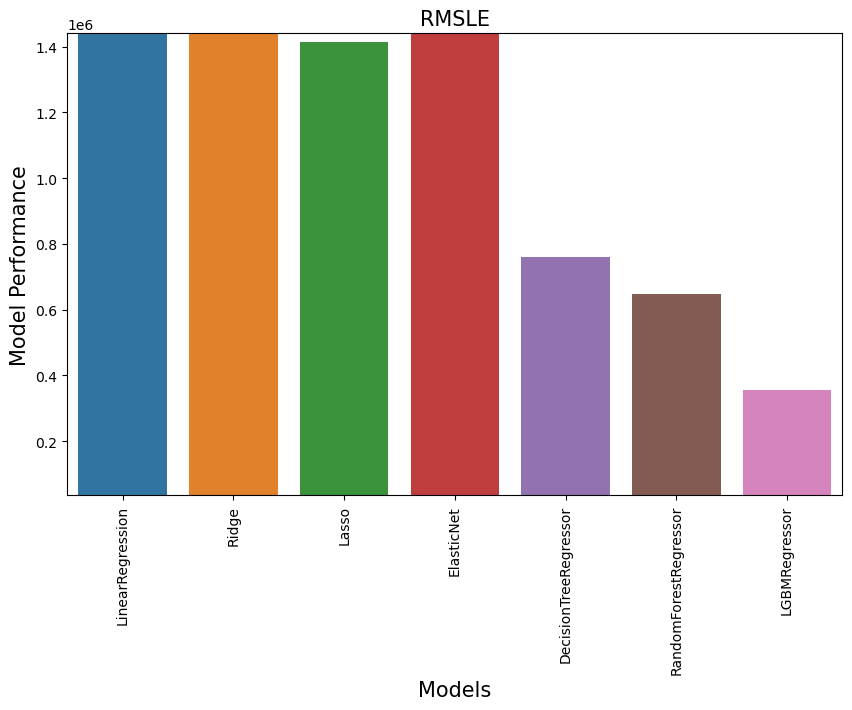

In [228]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=result_df['Model'], y=result_df['Score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model Performance', fontsize=15)
plt.ylim(3.540386e+04, 1.440735e+06)
plt.title('RMSLE', fontsize=15)
plt.show()

In [229]:
cut = int(len(train)*0.8)
h_train = train[:cut]
h_valid = train[cut:]

h_train_X = h_train.drop('value', axis=1)
h_train_y = h_train['value']
h_valid_X = h_valid.drop('value', axis=1)
h_valid_y = h_valid['value']
print(h_train_X.shape, h_train_y.shape, h_valid_X.shape, h_valid_y.shape)

(21470, 13) (21470,) (5368, 13) (5368,)


In [230]:
from sklearn.model_selection import train_test_split #랜덤 분할


X = train.drop('value', axis=1)
y = train['value']

h_train_X, h_valid_X, h_train_y, h_valid_y= train_test_split(X,y, test_size=0.2, random_state=304)

In [231]:
from optuna.samplers import TPESampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거
warnings.filterwarnings(action='ignore')

sampler = TPESampler(seed=10)
# LGBMRegressor(max_depth=9, min_child_weight=5, n_estimators=500)
def objective(trial):
    dtrain = lgb.Dataset(h_train_X, label=h_train_y)
    dtest = lgb.Dataset(h_valid_X, label=h_valid_y)

    param = {
        'objective': 'regression', # 회귀
        'verbose': -1,
        'metric': 'rmse', 
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-3, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 350, 600),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    model = lgb.LGBMRegressor(**param)
    lgb_model = model.fit(h_train_X, h_train_y, eval_set=[(h_valid_X, h_valid_y)], verbose=0, early_stopping_rounds=25)
    rmse = RMSE(h_valid_y, lgb_model.predict(h_valid_X))
    return rmse
        
study_lgb = optuna.create_study(direction='minimize', sampler=sampler)
study_lgb.optimize(objective, n_trials=200)

[I 2023-06-28 19:56:21,762] A new study created in memory with name: no-name-cbcf5790-eddc-4b9b-8897-13ad6f80f99d
[I 2023-06-28 19:56:23,218] Trial 0 finished with value: 3610154.7300211405 and parameters: {'max_depth': 13, 'learning_rate': 0.0011002817226254391, 'n_estimators': 509, 'min_child_samples': 78, 'subsample': 0.6315909175774905}. Best is trial 0 with value: 3610154.7300211405.
[I 2023-06-28 19:56:24,407] Trial 1 finished with value: 1917141.8423884697 and parameters: {'max_depth': 5, 'learning_rate': 0.002489577954043502, 'n_estimators': 540, 'min_child_samples': 25, 'subsample': 0.4337244827306443}. Best is trial 1 with value: 1917141.8423884697.
[I 2023-06-28 19:56:25,252] Trial 2 finished with value: 1066968.9791239554 and parameters: {'max_depth': 11, 'learning_rate': 0.08068386469121067, 'n_estimators': 350, 'min_child_samples': 56, 'subsample': 0.8422371309477078}. Best is trial 2 with value: 1066968.9791239554.
[I 2023-06-28 19:56:26,456] Trial 3 finished with value:

[I 2023-06-28 19:56:52,988] Trial 28 finished with value: 525490.1007089599 and parameters: {'max_depth': 9, 'learning_rate': 0.03583058425073904, 'n_estimators': 548, 'min_child_samples': 10, 'subsample': 0.8245613886390363}. Best is trial 21 with value: 522965.4252881732.
[I 2023-06-28 19:56:53,509] Trial 29 finished with value: 605100.0431704164 and parameters: {'max_depth': 9, 'learning_rate': 0.06625547112913514, 'n_estimators': 551, 'min_child_samples': 18, 'subsample': 0.8921215918369498}. Best is trial 21 with value: 522965.4252881732.
[I 2023-06-28 19:56:54,254] Trial 30 finished with value: 528796.9150481818 and parameters: {'max_depth': 9, 'learning_rate': 0.04185373291947062, 'n_estimators': 505, 'min_child_samples': 10, 'subsample': 0.9318200324584897}. Best is trial 21 with value: 522965.4252881732.
[I 2023-06-28 19:56:55,071] Trial 31 finished with value: 532523.6817034571 and parameters: {'max_depth': 9, 'learning_rate': 0.04142967173383702, 'n_estimators': 505, 'min_ch

[I 2023-06-28 19:57:15,926] Trial 57 finished with value: 677708.9562422272 and parameters: {'max_depth': 4, 'learning_rate': 0.08553971503954369, 'n_estimators': 412, 'min_child_samples': 30, 'subsample': 0.9053189825972054}. Best is trial 52 with value: 489420.5123795313.
[I 2023-06-28 19:57:16,406] Trial 58 finished with value: 483694.3646412395 and parameters: {'max_depth': 3, 'learning_rate': 0.07034671717599532, 'n_estimators': 450, 'min_child_samples': 14, 'subsample': 0.9985521723256803}. Best is trial 58 with value: 483694.3646412395.
[I 2023-06-28 19:57:16,887] Trial 59 finished with value: 582285.7383100063 and parameters: {'max_depth': 3, 'learning_rate': 0.09478627044166137, 'n_estimators': 453, 'min_child_samples': 24, 'subsample': 0.9604829818225232}. Best is trial 58 with value: 483694.3646412395.
[I 2023-06-28 19:57:17,375] Trial 60 finished with value: 491143.57077376527 and parameters: {'max_depth': 4, 'learning_rate': 0.057314468912112615, 'n_estimators': 438, 'min_

[I 2023-06-28 19:57:32,963] Trial 86 finished with value: 568423.1016192992 and parameters: {'max_depth': 14, 'learning_rate': 0.08605859537758055, 'n_estimators': 382, 'min_child_samples': 20, 'subsample': 0.8356109818781046}. Best is trial 82 with value: 452238.66621238884.
[I 2023-06-28 19:57:33,476] Trial 87 finished with value: 517665.6491694887 and parameters: {'max_depth': 4, 'learning_rate': 0.07375975576192535, 'n_estimators': 431, 'min_child_samples': 18, 'subsample': 0.862925221883243}. Best is trial 82 with value: 452238.66621238884.
[I 2023-06-28 19:57:34,020] Trial 88 finished with value: 656131.7345017273 and parameters: {'max_depth': 3, 'learning_rate': 0.05253153102730049, 'n_estimators': 424, 'min_child_samples': 26, 'subsample': 0.9232610510585934}. Best is trial 82 with value: 452238.66621238884.
[I 2023-06-28 19:57:34,450] Trial 89 finished with value: 468303.14770146745 and parameters: {'max_depth': 3, 'learning_rate': 0.06746517343665055, 'n_estimators': 369, 'mi

[I 2023-06-28 19:57:47,697] Trial 115 finished with value: 480509.4089650841 and parameters: {'max_depth': 3, 'learning_rate': 0.07376071107112629, 'n_estimators': 389, 'min_child_samples': 16, 'subsample': 0.8240579871285367}. Best is trial 109 with value: 440469.4141511683.
[I 2023-06-28 19:57:48,162] Trial 116 finished with value: 500126.3696741543 and parameters: {'max_depth': 3, 'learning_rate': 0.08640938182909501, 'n_estimators': 376, 'min_child_samples': 18, 'subsample': 0.7802876520375718}. Best is trial 109 with value: 440469.4141511683.
[I 2023-06-28 19:57:48,714] Trial 117 finished with value: 486295.9638275372 and parameters: {'max_depth': 4, 'learning_rate': 0.05135671772680947, 'n_estimators': 394, 'min_child_samples': 14, 'subsample': 0.752958864344197}. Best is trial 109 with value: 440469.4141511683.
[I 2023-06-28 19:57:49,234] Trial 118 finished with value: 443842.57208459807 and parameters: {'max_depth': 3, 'learning_rate': 0.09261630711263932, 'n_estimators': 367, 

[I 2023-06-28 19:58:03,067] Trial 144 finished with value: 482712.7475633905 and parameters: {'max_depth': 3, 'learning_rate': 0.08794241259245487, 'n_estimators': 365, 'min_child_samples': 12, 'subsample': 0.7752478137406902}. Best is trial 109 with value: 440469.4141511683.
[I 2023-06-28 19:58:03,467] Trial 145 finished with value: 491061.1424857368 and parameters: {'max_depth': 4, 'learning_rate': 0.07928459055825257, 'n_estimators': 358, 'min_child_samples': 14, 'subsample': 0.7972484869504209}. Best is trial 109 with value: 440469.4141511683.
[I 2023-06-28 19:58:03,940] Trial 146 finished with value: 471645.2441570215 and parameters: {'max_depth': 3, 'learning_rate': 0.09166315386172154, 'n_estimators': 377, 'min_child_samples': 16, 'subsample': 0.825082525500733}. Best is trial 109 with value: 440469.4141511683.
[I 2023-06-28 19:58:04,435] Trial 147 finished with value: 1070650.657871623 and parameters: {'max_depth': 3, 'learning_rate': 0.06117767309029324, 'n_estimators': 369, '

[I 2023-06-28 19:58:17,347] Trial 173 finished with value: 480358.5588225692 and parameters: {'max_depth': 3, 'learning_rate': 0.07948939131453191, 'n_estimators': 362, 'min_child_samples': 14, 'subsample': 0.8263257638501016}. Best is trial 109 with value: 440469.4141511683.
[I 2023-06-28 19:58:17,795] Trial 174 finished with value: 478610.19928923884 and parameters: {'max_depth': 3, 'learning_rate': 0.08790563969964772, 'n_estimators': 367, 'min_child_samples': 12, 'subsample': 0.8510860441520107}. Best is trial 109 with value: 440469.4141511683.
[I 2023-06-28 19:58:18,219] Trial 175 finished with value: 480320.60651648167 and parameters: {'max_depth': 3, 'learning_rate': 0.07532613911455248, 'n_estimators': 355, 'min_child_samples': 16, 'subsample': 0.9017850623028766}. Best is trial 109 with value: 440469.4141511683.
[I 2023-06-28 19:58:18,651] Trial 176 finished with value: 471985.44592999475 and parameters: {'max_depth': 3, 'learning_rate': 0.06795748380475519, 'n_estimators': 36

In [232]:
trial = study_lgb.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))

Best Trial: score 440469.4141511683,
params {'max_depth': 3, 'learning_rate': 0.08113563205390562, 'n_estimators': 356, 'min_child_samples': 10, 'subsample': 0.7787888026743461}


In [233]:
final_lgb_model = lgb.LGBMRegressor(**trial_params)
final_lgb_model.fit(train_X, train_y)
train_lgb_pred = final_lgb_model.predict(train_X)



In [235]:
#train error
RMSE(train_y, train_lgb_pred)

329578.6174263004

In [236]:
train

,position,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,relation_stat_value,relation_stat_value_po,promising,stat,Right,Left,log_reputation
0,4.0,31.0,5.0,94.0,94,4.0,110500000.0,2.679557e+07,2.679557e+07,15.161290,94.000000,0.0,1.0,1.791759
1,1.0,27.0,4.0,91.0,93,1.0,72000000.0,1.514068e+07,2.218298e+07,13.481481,92.010870,1.0,0.0,1.609438
2,4.0,31.0,5.0,91.0,91,3.0,80000000.0,1.514068e+07,1.514068e+07,14.677419,91.000000,1.0,0.0,1.791759
3,2.0,32.0,4.0,91.0,91,3.0,51000000.0,1.514068e+07,1.514068e+07,11.375000,91.000000,1.0,0.0,1.609438
4,1.0,25.0,3.0,90.0,93,1.0,68000000.0,1.247557e+07,2.218298e+07,10.800000,91.524590,1.0,0.0,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,3.0,19.0,1.0,47.0,65,2.0,60000.0,-4.647335e+05,-5.097894e+05,2.473684,57.446429,1.0,0.0,0.693147
26835,4.0,19.0,1.0,47.0,63,2.0,60000.0,-4.647335e+05,-5.326315e+05,2.473684,56.163636,1.0,0.0,0.693147
26836,4.0,16.0,1.0,47.0,67,2.0,60000.0,-4.647335e+05,-4.680967e+05,2.937500,58.754386,1.0,0.0,0.693147
26837,4.0,17.0,1.0,47.0,66,2.0,60000.0,-4.647335e+05,-4.917472e+05,2.764706,58.097345,1.0,0.0,0.693147


In [237]:
test

,position,age,reputation,stat_overall,stat_potential,stat_skill_moves,relation_stat_value,relation_stat_value_po,promising,stat,Right,Left,log_reputation
0,4,33,5.0,94,94,5.0,2.679557e+07,2.679557e+07,14.242424,94.000000,1.0,0.0,1.791759
1,4,26,5.0,92,93,5.0,1.834081e+07,2.218298e+07,17.692308,92.502703,1.0,0.0,1.791759
2,3,27,4.0,91,92,4.0,1.514068e+07,1.834081e+07,13.481481,91.502732,1.0,0.0,1.609438
3,4,27,4.0,91,91,4.0,1.514068e+07,1.514068e+07,13.481481,91.000000,1.0,0.0,1.609438
4,3,32,4.0,91,91,4.0,1.514068e+07,1.514068e+07,11.375000,91.000000,1.0,0.0,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,3,20,1.0,48,63,2.0,-4.736803e+05,-5.326315e+05,2.400000,56.513514,1.0,0.0,0.693147
3824,1,18,1.0,48,65,1.0,-4.736803e+05,-5.097894e+05,2.666667,57.778761,1.0,0.0,0.693147
3825,3,18,1.0,48,65,2.0,-4.736803e+05,-5.097894e+05,2.666667,57.778761,1.0,0.0,0.693147
3826,4,18,1.0,47,61,2.0,-4.647335e+05,-5.423830e+05,2.611111,54.907407,1.0,0.0,0.693147


In [238]:
final_lgb_pred = final_lgb_model.predict(test)

<BarContainer object of 13 artists>

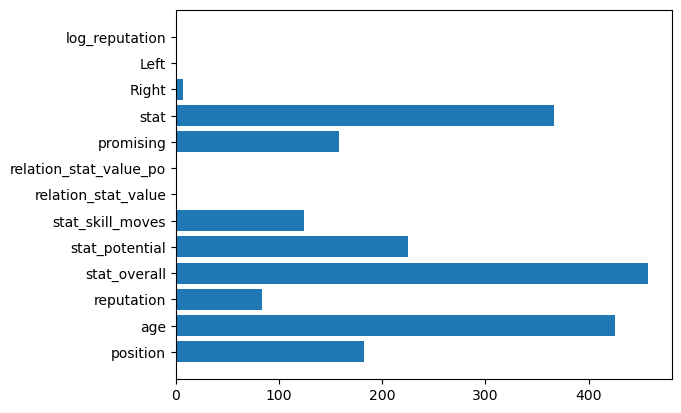

In [239]:
plt.barh(train_X.columns, final_lgb_model.feature_importances_)

In [240]:
sub = pd.read_csv('submission.csv', index_col = 0)
sub.head()

,value
id,
1,0
2,0
4,0
5,0
6,0


In [241]:
sub['value']=final_lgb_pred

In [242]:
sub

,value
id,
1,8.619518e+07
2,1.109142e+08
4,9.490189e+07
5,9.340153e+07
6,7.139045e+07
...,...
16924,9.733476e+04
16929,3.445791e+04
16932,8.705788e+04


In [243]:
sub['value']=np.exp(sub['value'].values)-1

In [244]:
sub

,value
id,
1,inf
2,inf
4,inf
5,inf
6,inf
...,...
16924,inf
16929,inf
16932,inf


In [245]:
sub.to_csv('sexyjangch.csv')